# Goal of the ML project 
- Dataset: gira bike sharing system data

- Time series and  Forecasting
- Apply techniques:
    - LSVM
    - ARIMA/ Linear Regression

# Data Selection

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

## Import Functions

### dslabs_functions

In [2]:
%run "scripts/dslabs_functions.py"

### data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


## Load Files 

### Holidays Calendar in Lisbon 2022

In [4]:
filepath_holidays_lx_2022 = r'data/holidays-lisbon-2022.xlsx'
#filepath_weather_ny_d = r'data/open-meteo-new-york-daily-2024.csv'
df_holidays_lx = pd.read_excel(filepath_holidays_lx_2022, na_values="")
df_holidays_lx.rename(columns={'holiday_lisbon': 'is_holiday_lisbon'}, inplace=True)
display(df_holidays_lx.head())

,date,is_holiday_lisbon
0,2022-01-01,1
1,2022-03-01,1
2,2022-04-15,1
3,2022-04-17,1
4,2022-04-25,1


### Weather file - Lisbon
- Weather info, hourly, from Lisbon for the year 2022
    - info: rain, precipitation, temperature,...
- This weather info was extracted from OpenMeteo
    - Link here - https://open-meteo.com/en/docs/historical-weather-api#latitude=38.7167&longitude=-9.1333&start_date=2019-01-01&end_date=2019-12-31&hourly=&daily=weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration&timezone=Europe%2FLondon&models=

    

In [5]:
filepath_weather_lx_h_2022 = r'data/open-meteo-lisbon-hourly-2022.csv'
#filepath_weather_ny_d = r'data/open-meteo-new-york-daily-2024.csv'

filepath_weather_lx_h_2023 = r'data/open-meteo-lisbon-hourly-2023.csv'
#filepath_weather_ny_d = r'data/open-meteo-new-york-daily-2024.csv'

In [6]:
df_weather_lx_h_2022 = pd.read_csv(filepath_weather_lx_h_2022,sep=';', na_values="")
display(df_weather_lx_h_2022.head())

df_weather_lx_h_2023 = pd.read_csv(filepath_weather_lx_h_2023,sep=';', na_values="")
display(df_weather_lx_h_2023.head())

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snow_depth (m),snowfall (cm),weather_code (wmo code),...,surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h)
0,2022-01-01T00:00,12.2,86,10.0,11.3,0.0,0.0,0.0,0.0,1,...,1019.5,21,0,0,60,6.5,9.2,56,129,11.5
1,2022-01-01T01:00,11.4,89,9.7,10.4,0.0,0.0,0.0,0.0,3,...,1019.2,96,0,0,96,6.1,9.0,50,119,10.8
2,2022-01-01T02:00,11.9,90,10.3,11.2,0.0,0.0,0.0,0.0,3,...,1019.2,99,0,0,99,5.6,10.1,50,107,10.4
3,2022-01-01T03:00,11.8,90,10.3,11.0,0.0,0.0,0.0,0.0,2,...,1019.0,51,0,0,51,6.7,12.9,54,103,12.2
4,2022-01-01T04:00,11.2,91,9.8,10.3,0.0,0.0,0.0,0.0,3,...,1018.9,99,0,0,99,6.1,12.4,45,100,11.9


,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snow_depth (m),snowfall (cm),weather_code (wmo code),...,surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h)
0,2023-01-01T00:00,16.5,85,14.0,14.8,0.0,0.0,0.0,0.0,2,...,1015.0,55,1,35,5,20.6,36.2,185,186,41.0
1,2023-01-01T01:00,16.4,86,14.1,14.7,0.0,0.0,0.0,0.0,0,...,1014.2,19,0,11,10,21.0,36.2,185,186,37.8
2,2023-01-01T02:00,16.3,86,14.0,14.6,0.0,0.0,0.0,0.0,0,...,1013.5,14,0,14,0,20.5,36.0,183,183,37.4
3,2023-01-01T03:00,16.5,84,13.8,14.4,0.0,0.0,0.0,0.0,2,...,1013.3,53,0,40,21,23.1,39.4,184,185,41.0
4,2023-01-01T04:00,16.8,83,13.9,14.3,0.0,0.0,0.0,0.0,3,...,1012.9,100,0,100,35,25.9,43.2,181,180,46.4


In [7]:
#merge 2023 and 2023 weather data

df_weather_lx_h = pd.concat([df_weather_lx_h_2022,df_weather_lx_h_2023],ignore_index=True )

In [8]:
display(df_weather_lx_h.head())
display(df_weather_lx_h.shape)
display(df_weather_lx_h_2022.shape)
display(df_weather_lx_h_2023.shape)

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snow_depth (m),snowfall (cm),weather_code (wmo code),...,surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h)
0,2022-01-01T00:00,12.2,86,10.0,11.3,0.0,0.0,0.0,0.0,1,...,1019.5,21,0,0,60,6.5,9.2,56,129,11.5
1,2022-01-01T01:00,11.4,89,9.7,10.4,0.0,0.0,0.0,0.0,3,...,1019.2,96,0,0,96,6.1,9.0,50,119,10.8
2,2022-01-01T02:00,11.9,90,10.3,11.2,0.0,0.0,0.0,0.0,3,...,1019.2,99,0,0,99,5.6,10.1,50,107,10.4
3,2022-01-01T03:00,11.8,90,10.3,11.0,0.0,0.0,0.0,0.0,2,...,1019.0,51,0,0,51,6.7,12.9,54,103,12.2
4,2022-01-01T04:00,11.2,91,9.8,10.3,0.0,0.0,0.0,0.0,3,...,1018.9,99,0,0,99,6.1,12.4,45,100,11.9


(17520, 21)

(8760, 21)

(8760, 21)

### Main file - Gira bike sharing system data
- Data on each gira stations in Lisbon, regarding available capacity by minute, between the period of 1/1/22 and 31/6/22.
    - Contains info on:
        - desig_comercial - Name of the gira bike station in Lisbon
        - num_bicicletas - Number of docked bikes in the station (station load)
        - num_docas - number of docks in the station (station capacity)
        - position - longitude and latitute points of the gira bike stations
        - entity_ts - time stamp of each record regarding the station load at each minute
        - estado - statu of the gira bike station, can be active or in repair
    - Data provided on dados.cm-lisboa website
        - link here - https://dados.cm-lisboa.pt/dataset/gira-bicicletas-de-lisboa-historico

In [9]:
filepath = 'data/estacoes-gira-1-semestre-2022.csv'

test_data = False
# Load the data

if test_data:
    df = pd.read_csv(filepath, na_values="")
    df: Dataframe = df.sample(frac = 0.1,sep = ',', replace = False)
else:
    df = pd.read_csv(filepath, sep =',', na_values="")
display(df)

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
0,417 - Av. Duque de Ávila / Jardim Arco Do Cego,3,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2022-01-01T13:38:03.130Z,active
1,446 - Av. República / Interface Entrecampos,25,40,"{""coordinates"":[-9.14773,38.74456],""type"":""Poi...",2022-01-01T13:38:04.625Z,active
2,416 - Av. República / Avenida Duque de Ávila,6,16,"{""coordinates"":[-9.14553,38.735304],""type"":""Po...",2022-01-01T13:38:03.751Z,active
3,103 - Jardim da Água,16,20,"{""coordinates"":[-9.095019,38.761218],""type"":""P...",2022-01-01T13:38:04.204Z,active
4,415 - Av. Duque de Ávila / Av. Conde Valbom,9,20,"{""coordinates"":[-9.148443,38.735188],""type"":""P...",2022-01-01T13:38:04.179Z,active
...,...,...,...,...,...,...
1555391,486 - Rua Hermano Neves / Rua José Escada,2,14,"{""coordinates"":[-9.16985,38.75954],""type"":""Poi...",2022-06-30T10:33:28.035Z,active
1555392,417 - Av. Duque de Ávila / Jardim Arco Do Cego,9,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2022-06-30T10:33:25.612Z,active
1555393,449 - Av. 5 de Outubro / Rua da Cruz Vermelha,0,14,"{""coordinates"":[-9.150085,38.746836],""type"":""P...",2022-06-30T10:13:36.074Z,active
1555394,479 - Rua Professor Oliveira Marques,13,14,"{""coordinates"":[-9.15724,38.75491],""type"":""Poi...",2022-06-30T10:13:37.004Z,active


#### 2022

In [10]:
import pandas as pd

# File paths
filepaths = ['data/estacoes-gira-1-semestre-2022.csv', 'data/estacoes-gira-2-semestre-2022.csv']

test_data = False

# Load the data
df_list = [pd.read_csv(file, sep=',', na_values="") for file in filepaths]

df = pd.concat(df_list, ignore_index=True)

# Convert 'entity_ts' to datetime
df['entity_ts'] = pd.to_datetime(df['entity_ts'].str[:-5])  # Remove os últimos 5 caracteres se necessário

df.sort_values(by='entity_ts', inplace=True)

# Sample if test_data is True, selecting the first 100000 rows or a random sample
if test_data:
    df = df.head(int(len(df) * 0.9)) 

# Filter out data from 2023
df_2022 = df[df['entity_ts'] < '2023-01-01']

# Display the first few rows and the shape of the DataFrame
display(df.head())
display(df.shape)

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
281082,485 - Rua Tomás da Fonseca / Rua António Albin...,9,10,"{""coordinates"":[-9.17,38.756],""type"":""Point""}",2022-01-01 12:18:01,active
1049486,421 - Alameda D. Afonso Henriques,6,20,"{""coordinates"":[-9.13416,38.73736],""type"":""Poi...",2022-01-01 12:18:01,active
1049481,433 - Av. Paris / Av. Almirante Reis,12,14,"{""coordinates"":[-9.13409,38.74095],""type"":""Poi...",2022-01-01 12:18:01,active
805128,222 - Praça da Figueira,7,30,"{""coordinates"":[-9.13828,38.71383],""type"":""Poi...",2022-01-01 12:18:01,active
281091,474 - Av. do Brasil / Av. Rio de Janeiro,9,16,"{""coordinates"":[-9.1409,38.75832],""type"":""Point""}",2022-01-01 12:18:01,active


(3938292, 6)

In [53]:
max_date = df_2022['entity_ts'].max()
min_date = df_2022['entity_ts'].min()
display(f'Max date in the sampled dataset: {max_date}')
display(f'Min date in the sampleddataset: {min_date}')

display(df_2022.head())
display(df_2022.shape)

'Max date in the sampled dataset: 2022-12-31 23:54:16'

'Min date in the sampleddataset: 2022-01-01 12:18:01'

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
281082,485 - Rua Tomás da Fonseca / Rua António Albin...,9,10,"{""coordinates"":[-9.17,38.756],""type"":""Point""}",2022-01-01 12:18:01,active
1049486,421 - Alameda D. Afonso Henriques,6,20,"{""coordinates"":[-9.13416,38.73736],""type"":""Poi...",2022-01-01 12:18:01,active
1049481,433 - Av. Paris / Av. Almirante Reis,12,14,"{""coordinates"":[-9.13409,38.74095],""type"":""Poi...",2022-01-01 12:18:01,active
805128,222 - Praça da Figueira,7,30,"{""coordinates"":[-9.13828,38.71383],""type"":""Poi...",2022-01-01 12:18:01,active
281091,474 - Av. do Brasil / Av. Rio de Janeiro,9,16,"{""coordinates"":[-9.1409,38.75832],""type"":""Point""}",2022-01-01 12:18:01,active


(3348370, 6)

#### 2023

In [11]:
import pandas as pd

# Caminho do arquivo Excel
excel_file = 'data/estacoes-gira-1-trimestre-2023.xlsx'  # Substitua pelo caminho correto do arquivo

# Carregar as duas sheets do Excel
df_jan_mar7 = pd.read_excel(excel_file, sheet_name='1 jan a 7mar')
df_mar8_mar31 = pd.read_excel(excel_file, sheet_name='8 a 31 marco23')

# Concatenar os dados das duas sheets em um único DataFrame
df_2023 = pd.concat([df_jan_mar7, df_mar8_mar31], ignore_index=True)

# Verificar se a coluna 'entity_ts' está no formato datetime (ajuste conforme necessário)
# Convert 'entity_ts' to datetime
df_2023['entity_ts'] = pd.to_datetime(df_2023['entity_ts'].str[:-5])  # Remove os últimos 5 caracteres se necessário

In [55]:
max_date = df_2023['entity_ts'].max()
min_date = df_2023['entity_ts'].min()
display(f'Max date in the sampled dataset: {max_date}')
display(f'Min date in the sampleddataset: {min_date}')
display(df_2023.head())
display(df_2023.shape)

'Max date in the sampled dataset: 2023-03-31 22:28:53'

'Min date in the sampleddataset: 2023-01-01 12:00:00'

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
0,410 - Rua da Mesquita / Universidade Nova de L...,11,40,"{""coordinates"":[-9.16015,38.73492],""type"":""Poi...",2023-01-01 12:14:19,active
1,417 - Av. Duque de Ávila / Jardim Arco Do Cego,3,23,"{""coordinates"":[-9.142703,38.735352],""type"":""P...",2023-01-01 12:14:19,active
2,301 - Avenida da Liberdade / Restauradores,6,21,"{""coordinates"":[-9.14242,38.71702],""type"":""Poi...",2023-01-01 12:14:20,active
3,459 - Rua Maria Amália Vaz de Carvalho / ES Ra...,15,20,"{""coordinates"":[-9.141741,38.751481],""type"":""P...",2023-01-01 12:14:20,active
4,218 - Cais do Sodré,9,22,"{""coordinates"":[-9.14471,38.70617],""type"":""Poi...",2023-01-01 12:14:18,active


(1188568, 6)

#### Merge 2022 + 2023 data

In [12]:
# merge df 2022 with df with 2023 data

df = pd.concat([df_2022,df_2023], ignore_index=True)
df = df.sort_values(by='entity_ts')

display(df.shape)
display(df.head())



(4536938, 6)

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado
0,485 - Rua Tomás da Fonseca / Rua António Albin...,9,10,"{""coordinates"":[-9.17,38.756],""type"":""Point""}",2022-01-01 12:18:01,active
1,421 - Alameda D. Afonso Henriques,6,20,"{""coordinates"":[-9.13416,38.73736],""type"":""Poi...",2022-01-01 12:18:01,active
2,433 - Av. Paris / Av. Almirante Reis,12,14,"{""coordinates"":[-9.13409,38.74095],""type"":""Poi...",2022-01-01 12:18:01,active
3,222 - Praça da Figueira,7,30,"{""coordinates"":[-9.13828,38.71383],""type"":""Poi...",2022-01-01 12:18:01,active
4,474 - Av. do Brasil / Av. Rio de Janeiro,9,16,"{""coordinates"":[-9.1409,38.75832],""type"":""Point""}",2022-01-01 12:18:01,active


# Data Cleaning/Transformation

- Feature Engineering steps
    - In this project, we have the main dataset (df) with capacity data for each gira bike station. In order to enrich the analysis, we decided to cross join this data with hourly meteorological conditions (from openMeteo) in Lisbon, to understand how the weather may influence the gira bike stations load over time. Lisbon's Holiday data was also included.

- Remove data from 2023 in the df main
- Add new features
    - Add holiday col
        - Add column is_holiday(0 or 1) that indicates if the day corresponds to a holiday date in 2022.
    -   Spacial:
        - longitude of the gira bike station
        - latitude of the gira bike station
    - Weather
        - weather_desc: The weather conditions during the ride (e.g., Overcast, Clear sky, Rainy).
        rain: The amount of rain (in mm) during the ride.
        - temperature: The temperature (in °C) during the ride.
    - Create col station load target:
        - station_target_load hourly (numbicicletas / numdocas) * 100
    - station_A_load hourly
    - station_B_load hourly
    - station_C_load hourly
    - station_D_load hourly    

- Agreggation:
    - Aggregate the data hourly to have less rows
- Rename original cols from main df - citi bike
- Remove id columns: make sure to remove id columns from the df
- Create dataset for data exploration:
    - normal dataset with
- Create dataset for time forecasting (1):
    - trasnform the dataset
    - create taget columns (station load for target station)
    - keep external variables (station_a, station_b, station_c, weather_info, is_holiday)
- Create dataset for time forecasting (2):
    - trasnform the dataset
    - create taget columns (station load for target station)
    - remove external variables

## Remove data from 2023 in the main df

In [13]:
#Put True if we only want 2022 data

only_2022_data = False

# if rule
if only_2022_data:
    df = df[df['entity_ts'].dt.year != 2023]
else:
    df

display(df.shape)

(4536938, 6)

## Remove rows where numbicicletas > num docas - errors
    - We found some small cases where we have more numbiciletas than numdocas which is not possible. These are probably errors in the logs measures by the gira app. We will remove these cases

In [14]:
df = df[df['numbicicletas'] <= df['numdocas']]
df.shape

(4536824, 6)

## Add Holiday column to main df

|

In [15]:
# Convert 'date' column in df_holidays_lx to datetime
df_holidays_lx['date'] = pd.to_datetime(df_holidays_lx['date'])


# Extract hour and day from 'entity_ts'
df['entity_ts_hour'] = df['entity_ts'].dt.floor('H')  # Extrai a hora (arredondada para baixo)
df['entity_ts_day'] = df['entity_ts'].dt.normalize()  # Extrai a data (sem horário)

# Realize o merge
df = df.merge(df_holidays_lx, left_on='entity_ts_day', right_on='date', how='left')
df['is_holiday_lisbon'] = df['is_holiday_lisbon'].fillna(0)

df.drop(columns=['date'], inplace=True)

# Exiba o DataFrame resultante
display(df.head())

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado,entity_ts_hour,entity_ts_day,is_holiday_lisbon
0,485 - Rua Tomás da Fonseca / Rua António Albin...,9,10,"{""coordinates"":[-9.17,38.756],""type"":""Point""}",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0
1,421 - Alameda D. Afonso Henriques,6,20,"{""coordinates"":[-9.13416,38.73736],""type"":""Poi...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0
2,433 - Av. Paris / Av. Almirante Reis,12,14,"{""coordinates"":[-9.13409,38.74095],""type"":""Poi...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0
3,222 - Praça da Figueira,7,30,"{""coordinates"":[-9.13828,38.71383],""type"":""Poi...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0
4,474 - Av. do Brasil / Av. Rio de Janeiro,9,16,"{""coordinates"":[-9.1409,38.75832],""type"":""Point""}",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0


In [16]:
df['is_holiday_lisbon'].value_counts()

is_holiday_lisbon
0.0    4374135
1.0     162689
Name: count, dtype: int64

## Add longituded and latitude of the station column

In [17]:
import json
# Convert the position column to JSON format and extract lat and long
df['position'] = df['position'].apply(json.loads)

df['gira_station_long'] = df['position'].apply(lambda x: x['coordinates'][0])
df['gira_station_lat'] = df['position'].apply(lambda x: x['coordinates'][1])
df.head()


,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado,entity_ts_hour,entity_ts_day,is_holiday_lisbon,gira_station_long,gira_station_lat
0,485 - Rua Tomás da Fonseca / Rua António Albin...,9,10,"{'coordinates': [-9.17, 38.756], 'type': 'Point'}",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.17000,38.75600
1,421 - Alameda D. Afonso Henriques,6,20,"{'coordinates': [-9.13416, 38.73736], 'type': ...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.13416,38.73736
2,433 - Av. Paris / Av. Almirante Reis,12,14,"{'coordinates': [-9.13409, 38.74095], 'type': ...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.13409,38.74095
3,222 - Praça da Figueira,7,30,"{'coordinates': [-9.13828, 38.71383], 'type': ...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.13828,38.71383
4,474 - Av. do Brasil / Av. Rio de Janeiro,9,16,"{'coordinates': [-9.1409, 38.75832], 'type': '...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.14090,38.75832


## Add weather info cols in main df

- Weather info, hourly, from Lisbon for the year 2022
    - info: rain, precipitation, temperature,...
- This weather info was extracted from OpenMeteo
    - Link here -https://open-meteo.com/en/docs/historical-weather-api#latitude=38.7167&longitude=-9.1333&start_date=2019-01-01&end_date=2019-12-31&hourly=&daily=weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration&timezone=Europe%2FLondon&models=

Info on dataset columns:
- snowfall = 5 cm (new snow that felt in a specific hour)
- snow_depth = 15 cm (total snow accumulated in the floor in a specific hour)
- rain_sum (mm) = Total sum of liquid rain (excludes snow, hail, etc.).
- precipitation_sum (mm) = Total sum of all precipitation (includes rain, snow, hail, etc.)
- cloud_cover (%): Represents the total percentage of the sky covered by clouds at all altitudes, without distinguishing between low, middle, or high
- cloud_cover_low (%): Represents the percentage of cloud cover specifically at low altitudes, typically below 2 km.- cloud_cover_mid (%) = Percentage of cloud cover at mid altitudes (typically between 2 km and 6 km).
- cloud_cover_high (%) = Percentage of cloud cover at high altitudes (typically above 6 km).
- wind_speed_10m (km/h)= Represents the wind speed measured at 10 meters above ground level, in kilometers per hour (km/h). This is typically used to assess the strength of the wind near the surface.
- weather_code (wmo code)	- World meteorological code for that hour 
    - cloudly, sunny, mist

    

In [18]:
#Let's use the hourly dataset to have detailed weather info

#convert time to datetime format
df_weather_lx_h['time'] = pd.to_datetime(df_weather_lx_h['time'])

#drop meteo columns that are not relevant for the analysis
df_weather_lx_h.drop(columns = [
    'apparent_temperature (°C)',
    'relative_humidity_2m (%)',
    'dew_point_2m (°C)',
    'precipitation (mm)',
    'wind_speed_100m (km/h)',
    'snow_depth (m)',
    'snowfall (cm)',
    'cloud_cover_low (%)',
    'cloud_cover (%)',
    'cloud_cover_mid (%)',
    'cloud_cover_high (%)',
    'pressure_msl (hPa)',
    'surface_pressure (hPa)',
    'wind_direction_10m (°)',
    'wind_direction_100m (°)',
    'wind_gusts_10m (km/h)'],
inplace=True)

display(df_weather_lx_h.head())

,time,temperature_2m (°C),rain (mm),weather_code (wmo code),wind_speed_10m (km/h)
0,2022-01-01 00:00:00,12.2,0.0,1,6.5
1,2022-01-01 01:00:00,11.4,0.0,3,6.1
2,2022-01-01 02:00:00,11.9,0.0,3,5.6
3,2022-01-01 03:00:00,11.8,0.0,2,6.7
4,2022-01-01 04:00:00,11.2,0.0,3,6.1


##### Get list/dictionairy with the description of WMO Weather codes
- source: WMO- world meteorological organization

In [19]:
# Dictionary with WMO weather codes and descriptions
wmo_weather_codes = {
    0: "Clear sky",
    1: "Mainly clear",
    2: "Partly cloudy",
    3: "Overcast",
    45: "Fog",
    48: "Depositing rime fog",
    51: "Drizzle: Light",
    53: "Drizzle: Moderate",
    55: "Drizzle: Dense",
    56: "Freezing drizzle: Light",
    57: "Freezing drizzle: Dense",
    61: "Rain: Slight",
    63: "Rain: Moderate",
    65: "Rain: Heavy",
    66: "Freezing rain: Light",
    67: "Freezing rain: Heavy",
    71: "Snowfall: Slight",
    73: "Snowfall: Moderate",
    75: "Snowfall: Heavy",
    77: "Snow grains",
    80: "Rain showers: Slight",
    81: "Rain showers: Moderate",
    82: "Rain showers: Violent",
    85: "Snow showers: Slight",
    86: "Snow showers: Heavy",
    95: "Thunderstorm: Slight or moderate",
    96: "Thunderstorm with slight hail",
    99: "Thunderstorm with heavy hail"
}

df_wmo_weather_codes =pd.DataFrame(list(wmo_weather_codes.items()), columns = ['wmo_code', 'wmo_weather_desc'])
display(df_wmo_weather_codes)

,wmo_code,wmo_weather_desc
0,0,Clear sky
1,1,Mainly clear
2,2,Partly cloudy
3,3,Overcast
4,45,Fog
5,48,Depositing rime fog
6,51,Drizzle: Light
7,53,Drizzle: Moderate
8,55,Drizzle: Dense
9,56,Freezing drizzle: Light


#### Add weather description to the weather dataset
- Cloud Cover
- Overcast → The sky is completely covered with clouds (100% cloud cover).
- Partly cloudy → A mix of clouds and clear sky, typically 30-70% cloud cover.
- Mainly clear → Mostly clear with a few scattered clouds (10-30% cloud cover).
- Clear sky → No significant clouds, nearly 0% cloud cover.
- ❄️ Snowfall
- Snowfall: Slight → Light snowflakes falling, minimal accumulation.
- Snowfall: Moderate → Steady snowfall with noticeable accumulation.
- Snowfall: Heavy → Intense snowfall with rapid accumulation, possibly reducing visibility.
- 🌧 Drizzle (Light, fine rain with small droplets)
- Drizzle: Light → A few small droplets falling intermittently, barely wetting the ground.
- Drizzle: Moderate → Continuous fine rain, making surfaces damp.
- Drizzle: Dense → Heavy drizzle, creating persistent wet conditions, but not forming puddles.
- 🌦 Rain (Heavier precipitation than drizzle)
- Rain: Slight → Light rain with small raindrops and little accumulation.
- Rain: Moderate → Steady rain that wets the ground and can form small puddles.
- Rain: Heavy → Intense rainfall, quickly accumulating, possibly causing water runoff.

In [20]:
df_weather_lx_h = df_weather_lx_h.merge(
    df_wmo_weather_codes,
    left_on='weather_code (wmo code)',
    right_on= 'wmo_code', 
    how = 'left')

df_weather_lx_h.rename(columns={
    'temperature_2m (°C)': 'temperature_2m',
    'rain (mm)': 'rain_mm',
    'weather_code (wmo code)': 'wmo_weather_code',
    'wind_speed_10m (km/h)': 'wind_speed_10m',
}, inplace=True)

df_weather_lx_h.drop(columns = ['wmo_code'], inplace=True)

display(df_weather_lx_h.head(10))

,time,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc
0,2022-01-01 00:00:00,12.2,0.0,1,6.5,Mainly clear
1,2022-01-01 01:00:00,11.4,0.0,3,6.1,Overcast
2,2022-01-01 02:00:00,11.9,0.0,3,5.6,Overcast
3,2022-01-01 03:00:00,11.8,0.0,2,6.7,Partly cloudy
4,2022-01-01 04:00:00,11.2,0.0,3,6.1,Overcast
5,2022-01-01 05:00:00,11.1,0.0,3,5.9,Overcast
6,2022-01-01 06:00:00,11.3,0.0,3,6.9,Overcast
7,2022-01-01 07:00:00,11.4,0.0,3,8.1,Overcast
8,2022-01-01 08:00:00,11.3,0.0,3,8.9,Overcast
9,2022-01-01 09:00:00,12.0,0.0,3,9.1,Overcast


#### Merge weather data with main df gira_bike

In [21]:
#merge the df main with the weather data df on time column
df = df.merge(
    df_weather_lx_h,
    left_on='entity_ts_hour',
    right_on='time',
    how = 'left'
)

#drop time col from the weather df as is not relevant anymore
df = df.drop(columns=['time'])

display(df.head())
display(df.shape)

,desigcomercial,numbicicletas,numdocas,position,entity_ts,estado,entity_ts_hour,entity_ts_day,is_holiday_lisbon,gira_station_long,gira_station_lat,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc
0,485 - Rua Tomás da Fonseca / Rua António Albin...,9,10,"{'coordinates': [-9.17, 38.756], 'type': 'Point'}",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.17000,38.75600,16.9,0.0,3,5.4,Overcast
1,421 - Alameda D. Afonso Henriques,6,20,"{'coordinates': [-9.13416, 38.73736], 'type': ...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.13416,38.73736,16.9,0.0,3,5.4,Overcast
2,433 - Av. Paris / Av. Almirante Reis,12,14,"{'coordinates': [-9.13409, 38.74095], 'type': ...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.13409,38.74095,16.9,0.0,3,5.4,Overcast
3,222 - Praça da Figueira,7,30,"{'coordinates': [-9.13828, 38.71383], 'type': ...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.13828,38.71383,16.9,0.0,3,5.4,Overcast
4,474 - Av. do Brasil / Av. Rio de Janeiro,9,16,"{'coordinates': [-9.1409, 38.75832], 'type': '...",2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.14090,38.75832,16.9,0.0,3,5.4,Overcast


(4536824, 16)

- Check if we have any value in df with null value in weather description

In [22]:
df_null_weather_desc = df['wmo_weather_desc'].isnull().sum()
display(df_null_weather_desc)


0

## Add col target - station load rate

- A station load in a shared bike station refers to the number of bikes that are currently docked at the station, meaning the number of bikes available for users to take.

    - Station Load Rate Formula
        - The station load rate measures how full the station is relative to its total capacity and can be calculated as:

    - Station Load Rate = (num_bicicletas / num_docas ) × 100
        - num_bicicletas → Number of bikes currently docked at the station.
        - num_docas → Total number of docks available in the station (maximum capacity).
        - Station Load Rate (%) → Percentage of the station's occupancy.

    - Example:
        - If a station has 15 bikes available and 30 total docks, then:
        - 15/30 × 100 =  50 % . This means the station is 50% full.

In [23]:
df['station_load_rate'] = ((df['numbicicletas'] / df['numdocas'])*100).round(1)
df['gira_station_id'] = df['desigcomercial'].str.split('-').str[0].str.replace(' ', '').astype(int)
df['gira_station_name'] = df['desigcomercial'].str.split('-').str[1]

df.drop(columns = ['desigcomercial','position'], inplace=True)
df.head()

,numbicicletas,numdocas,entity_ts,estado,entity_ts_hour,entity_ts_day,is_holiday_lisbon,gira_station_long,gira_station_lat,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,station_load_rate,gira_station_id,gira_station_name
0,9,10,2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.17000,38.75600,16.9,0.0,3,5.4,Overcast,90.0,485,Rua Tomás da Fonseca / Rua António Albino Mac...
1,6,20,2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.13416,38.73736,16.9,0.0,3,5.4,Overcast,30.0,421,Alameda D. Afonso Henriques
2,12,14,2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.13409,38.74095,16.9,0.0,3,5.4,Overcast,85.7,433,Av. Paris / Av. Almirante Reis
3,7,30,2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.13828,38.71383,16.9,0.0,3,5.4,Overcast,23.3,222,Praça da Figueira
4,9,16,2022-01-01 12:18:01,active,2022-01-01 12:00:00,2022-01-01,1.0,-9.14090,38.75832,16.9,0.0,3,5.4,Overcast,56.2,474,Av. do Brasil / Av. Rio de Janeiro


In [69]:
df['gira_station_name'].nunique()

150

In [70]:
df['gira_station_name']

0           Rua Tomás da Fonseca / Rua António Albino Mac...
1                                Alameda D. Afonso Henriques
2                             Av. Paris / Av. Almirante Reis
3                                          Praça da Figueira
4                         Av. do Brasil / Av. Rio de Janeiro
                                 ...                        
4536819             Av. Duque de Ávila / Jardim Arco Do Cego
4536820     Av. António José de Almeida / Instituto Super...
4536821                Rua Guiomar Torresão/Metro de Carnide
4536822     Av. António José de Almeida / Instituto Super...
4536823             Av. Duque de Ávila / Jardim Arco Do Cego
Name: gira_station_name, Length: 4536824, dtype: object

## Agreggation by 2-hour level

In [71]:
import pandas as pd

# Assuming you already have the DataFrame df

# Função para calcular a moda (valor mais frequente)
def moda(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Step 1: Aggregate station_load_rate, numbicicletas, numdocas, and estado by hour and station
df_aggregated = df.groupby(['gira_station_id', 'gira_station_name', 'gira_station_lat', 'gira_station_long', 'entity_ts_hour']).agg({
    'station_load_rate': 'mean',  # Average station load rate per hour
    'numbicicletas': 'mean',      # Average number of bikes per hour
    'numdocas': 'mean',           # Average number of docks per hour
    'estado': moda                # Most frequent state (mode) per hour
}).reset_index()

# Step 2: Corrigir station_load_rate quando numdocas e numbicicletas são 0
condition = (df_aggregated['numdocas'] == 0) & (df_aggregated['numbicicletas'] == 0)
df_aggregated['station_load_rate'] = df_aggregated['station_load_rate'].fillna(0).where(~condition, 0)

# Renomear a coluna agregada de estado
df_aggregated.rename(columns={'estado': 'gira_station_status_hourly'}, inplace=True)

# Step 2: Join meteorological variables
# Select relevant columns to join
df_meteo = df[['entity_ts_hour', 'temperature_2m', 'rain_mm', 'wmo_weather_code', 'wind_speed_10m', 'wmo_weather_desc','is_holiday_lisbon']].drop_duplicates()

# Join meteorological variables
df_agg = pd.merge(df_aggregated, df_meteo, on='entity_ts_hour', how='left')

# Step 3: Drop the entity_ts column if it exists
if 'entity_ts' in df_agg.columns:
    df_agg.drop(columns=['entity_ts'], inplace=True)

# Step 4: Verify the final DataFrame
display(df_agg.head())

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon
0,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 12:00:00,43.80,7.00,16.0,active,16.9,0.0,3,5.4,Overcast,1.0
1,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 13:00:00,46.90,7.50,16.0,active,17.9,0.0,3,5.5,Overcast,1.0
2,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 15:00:00,93.80,15.00,16.0,active,18.6,0.0,3,5.8,Overcast,1.0
3,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 16:00:00,56.25,9.00,16.0,active,17.9,0.0,2,5.9,Partly cloudy,1.0
4,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 17:00:00,67.15,10.75,16.0,active,15.5,0.0,3,6.5,Overcast,1.0


In [63]:
import pandas as pd

# Função para calcular a moda (valor mais frequente)
def moda(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Ajustar entity_ts_hour para representar intervalos de 2 em 2 horas
df['entity_ts_hour'] = df['entity_ts_hour'].dt.floor('2H')

# Step 1: Aggregate station_load_rate, numbicicletas, numdocas, and estado by 2-hour intervals
df_aggregated = df.groupby(['gira_station_id', 'gira_station_name', 'gira_station_lat', 'gira_station_long', 'entity_ts_hour', 'is_holiday_lisbon']).agg({
    'station_load_rate': 'mean',  # Average station load rate per 2h
    'numbicicletas': 'mean',      # Average number of bikes per 2h
    'numdocas': 'mean',           # Average number of docks per 2h
    'estado': moda                # Most frequent state (mode) per 2h
}).reset_index()

# Corrigir station_load_rate quando numdocas e numbicicletas são 0
condition = (df_aggregated['numdocas'] == 0) & (df_aggregated['numbicicletas'] == 0)
df_aggregated['station_load_rate'] = df_aggregated['station_load_rate'].fillna(0).where(~condition, 0)

# Renomear a coluna agregada de estado
df_aggregated.rename(columns={'estado': 'gira_station_status_hourly'}, inplace=True)

# Step 2: Retain is_holiday_lisbon (no aggregation) and merge meteorological variables
df_meteo = df[['entity_ts_hour', 'temperature_2m', 'rain_mm', 'wind_speed_10m', 'wmo_weather_code', 'wmo_weather_desc']]

# Agregar as variáveis meteorológicas
df_meteo_aggregated = df_meteo.groupby(['entity_ts_hour']).agg({
    'temperature_2m': 'mean',   # Average temperature per 2h
    'rain_mm': 'mean',          # Average rain per 2h
    'wind_speed_10m': 'mean',   # Average wind speed per 2h
    'wmo_weather_desc': moda,   # Custom mode aggregation for 'wmo_weather_desc'
    'wmo_weather_code': moda,   # Custom mode aggregation for 'wmo_weather_code'
}).reset_index()

# Step 3: Merge aggregated station data and meteorological data
df_agg = pd.merge(df_aggregated, df_meteo_aggregated, on='entity_ts_hour', how='left')

# Step 5: Verify the final DataFrame
display(df_agg.head())


,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,is_holiday_lisbon,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wind_speed_10m,wmo_weather_desc,wmo_weather_code
0,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 12:00:00,1.0,45.866667,7.333333,16.0,active,17.436986,0.0,5.453699,Overcast,3
1,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 14:00:00,1.0,93.800000,15.000000,16.0,active,18.557143,0.0,5.757143,Overcast,3
2,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 16:00:00,1.0,61.700000,9.875000,16.0,active,16.710327,0.0,6.197418,Partly cloudy,2
3,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 18:00:00,1.0,85.400000,13.666667,16.0,active,13.900000,0.0,7.625287,Overcast,3
4,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 20:00:00,1.0,93.800000,15.000000,16.0,active,13.841834,0.0,8.816332,Overcast,3


In [64]:
display(df.shape)
display(df_agg.shape)

(4536824, 18)

(714842, 15)

In [65]:
display(df.shape)
display(df_agg.shape)

(4536824, 18)

(714842, 15)

In [66]:
# Verificar estatísticas descritivas
print(df_agg.describe())

# Verificar valores únicos na coluna hourly_estado
print(df_agg['gira_station_status_hourly'].unique())

       gira_station_id  gira_station_lat  gira_station_long  \
count    714842.000000     714842.000000      714842.000000   
mean        346.697509         38.743133          -9.143913   
min         101.000000         38.693500          -9.212149   
25%         218.000000         38.728049          -9.157235   
50%         408.000000         38.744730          -9.146170   
75%         464.000000         38.760810          -9.135956   
max         556.000000         38.793000          -9.092350   
std         141.763923          0.022225           0.024473   

                      entity_ts_hour  is_holiday_lisbon  station_load_rate  \
count                         714842      714842.000000      714842.000000   
mean   2022-08-28 17:21:39.308099328           0.033455          35.369373   
min              2022-01-01 12:00:00           0.000000           0.000000   
25%              2022-05-11 16:00:00           0.000000          13.650000   
50%              2022-09-02 16:00:00      

#### Check if we have duplicates by hour and station after aggregation

In [67]:
# Verificar duplicatas por estação e hora
duplicates = df_agg.duplicated(subset=['gira_station_id', 'entity_ts_hour'], keep=False)
if duplicates.any():
    print("Há duplicatas nas combinações de estação e hora.")
else:
    print("Não há duplicatas nas combinações de estação e hora.")

Há duplicatas nas combinações de estação e hora.


In [68]:
# Verificar duplicatas por estação e hora
duplicates = df_agg[df_agg.duplicated(subset=['gira_station_id', 'entity_ts_hour'], keep=False)]

# Mostrar as duplicatas
display(duplicates.head(20))


,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,is_holiday_lisbon,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wind_speed_10m,wmo_weather_desc,wmo_weather_code
191948,221,Rua do Crucifixo / Rua São Nicolau,38.710191,-9.138828,2022-04-13 06:00:00,0.0,20.000000,3.000000,15.0,active,12.387165,0.0,11.248658,Mainly clear,1
193254,221,Rua do Crucifixo/Rua São Nicolau,38.710061,-9.138772,2022-02-21 10:00:00,0.0,6.700000,1.000000,15.0,active,14.172696,0.0,15.172184,Clear sky,0
193255,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 10:00:00,0.0,0.000000,0.000000,15.0,repair,14.172696,0.0,15.172184,Clear sky,0
193847,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-04-13 06:00:00,0.0,26.700000,4.000000,15.0,active,12.387165,0.0,11.248658,Mainly clear,1
281391,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 10:00:00,0.0,0.000000,0.000000,18.0,repair,15.727143,0.0,28.200000,Mainly clear,1
285862,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724904,-9.134844,2022-03-16 10:00:00,0.0,11.100000,2.000000,18.0,active,15.727143,0.0,28.200000,Mainly clear,1
309454,361,Amoreiras Shopping Center,38.723876,-9.161044,2022-04-13 08:00:00,0.0,4.000000,1.000000,25.0,repair,14.488357,0.0,15.229625,Mainly clear,1
309455,361,Amoreiras Shopping Center,38.723920,-9.160992,2022-04-13 08:00:00,0.0,1.066667,0.333333,31.0,repair,14.488357,0.0,15.229625,Mainly clear,1
644174,507,Rua José dos Santos Pereira / Rua Conde de Al...,38.744727,-9.193024,2022-08-21 20:00:00,0.0,0.000000,0.000000,17.0,repair,20.337943,0.0,22.248229,Overcast,3
646840,507,Rua José dos Santos Pereira / Rua Conde de Al...,38.744870,-9.193084,2022-08-21 20:00:00,0.0,0.000000,0.000000,17.0,repair,20.337943,0.0,22.248229,Overcast,3


- He have these 2 cases, because in the same hour for station 221 and 312, there was 2 status. Basically these station, in the same hour were active and also in repair

In [32]:
df_agg_dups_1 = df_agg[ 
    (df_agg['gira_station_id']==221) & (df_agg['entity_ts_hour'].dt.date == pd.to_datetime('2022-02-21').date())
]
display(df_agg_dups_1)

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon
385198,221,Rua do Crucifixo/Rua São Nicolau,38.710061,-9.138772,2022-02-21 08:00:00,0.0,0.0,15.0,active,10.5,0.0,1,16.1,Mainly clear,0.0
385199,221,Rua do Crucifixo/Rua São Nicolau,38.710061,-9.138772,2022-02-21 08:00:00,0.0,0.0,15.0,active,11.9,0.0,0,15.8,Clear sky,0.0
385200,221,Rua do Crucifixo/Rua São Nicolau,38.710061,-9.138772,2022-02-21 10:00:00,6.7,1.0,15.0,active,13.4,0.0,0,15.8,Clear sky,0.0
385201,221,Rua do Crucifixo/Rua São Nicolau,38.710061,-9.138772,2022-02-21 10:00:00,6.7,1.0,15.0,active,15.0,0.0,2,14.5,Partly cloudy,0.0
385202,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 10:00:00,0.0,0.0,15.0,repair,13.4,0.0,0,15.8,Clear sky,0.0
385203,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 10:00:00,0.0,0.0,15.0,repair,15.0,0.0,2,14.5,Partly cloudy,0.0
385204,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 12:00:00,0.0,0.0,15.0,repair,17.4,0.0,3,11.2,Overcast,0.0
385205,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 12:00:00,0.0,0.0,15.0,repair,18.6,0.0,0,9.8,Clear sky,0.0
385206,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 14:00:00,0.0,0.0,15.0,repair,19.3,0.0,2,9.1,Partly cloudy,0.0
385207,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 14:00:00,0.0,0.0,15.0,repair,19.6,0.0,0,9.7,Clear sky,0.0


In [77]:
df_agg_dups = df_agg[ 
    (df_agg['gira_station_id']==312) & (df_agg['entity_ts_hour'].dt.date == pd.to_datetime('2022-03-16').date())
]
display(df_agg_dups)

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon
513268,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 11:00:00,0.0,0.0,18.0,repair,16.2,0.0,1,28.2,Mainly clear,0.0
513269,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 12:00:00,0.0,0.0,18.0,repair,17.5,0.0,1,22.3,Mainly clear,0.0
513270,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 13:00:00,0.0,0.0,18.0,repair,16.8,0.0,3,25.6,Overcast,0.0
513271,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 14:00:00,0.0,0.0,18.0,repair,15.8,0.0,3,28.5,Overcast,0.0
513272,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 15:00:00,0.0,0.0,18.0,repair,16.3,0.3,51,25.6,Drizzle: Light,0.0
513273,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 16:00:00,0.0,0.0,18.0,repair,14.9,0.3,51,27.3,Drizzle: Light,0.0
513274,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 17:00:00,0.0,0.0,18.0,repair,14.3,0.0,3,28.1,Overcast,0.0
513275,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 18:00:00,0.0,0.0,18.0,repair,14.3,0.0,1,28.3,Mainly clear,0.0
513276,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 19:00:00,0.0,0.0,18.0,repair,13.4,0.0,1,30.1,Mainly clear,0.0
513277,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 20:00:00,0.0,0.0,18.0,repair,13.3,0.0,1,28.7,Mainly clear,0.0


#### remove duplicate rows considering status=repair 

In [69]:
# Passo 1: Identificar as duplicatas
duplicates = df_agg[df_agg.duplicated(subset=['gira_station_id', 'entity_ts_hour'], keep=False)]

# Passo 2: Filtrar as linhas duplicadas onde o status é 'repair'
repair_stations = duplicates[duplicates['gira_station_status_hourly'] == 'repair']

# Passo 3: Remover todas as duplicatas
df_agg_no_duplicates = df_agg.drop_duplicates(subset=['gira_station_id', 'entity_ts_hour'], keep=False)

# Passo 4: Concatenar as linhas com status 'repair' de volta
df_agg_cleaned = pd.concat([df_agg_no_duplicates, repair_stations])

# Passo 5: Ordenar (opcional) para garantir a ordem dos dados
df_agg_cleaned = df_agg_cleaned.sort_values(by=['entity_ts_hour'])

# Exibir o resultado
display(df_agg_cleaned.head(20))



,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,is_holiday_lisbon,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wind_speed_10m,wmo_weather_desc,wmo_weather_code
0,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 12:00:00,1.0,45.866667,7.333333,16.0,active,17.436986,0.0,5.453699,Overcast,3
126035,203,Padrão dos Descobrimentos,38.693500,-9.206330,2022-01-01 12:00:00,1.0,54.500000,12.000000,22.0,active,17.436986,0.0,5.453699,Overcast,3
556931,473,Av. do Brasil / Av. de Roma,38.756430,-9.146970,2022-01-01 12:00:00,1.0,55.916667,7.833333,14.0,active,17.436986,0.0,5.453699,Overcast,3
131381,205,Av. Brasília / Cordoaria,38.697000,-9.188000,2022-01-01 12:00:00,1.0,30.000000,3.000000,10.0,active,17.436986,0.0,5.453699,Overcast,3
333417,401,Rua Martens Ferrão / Av. Fontes Pereira de Melo,38.728940,-9.147420,2022-01-01 12:00:00,1.0,28.100000,4.500000,16.0,active,17.436986,0.0,5.453699,Overcast,3
551592,472,Rua Marquês Soveral / ES Padre António Vieira,38.757840,-9.136080,2022-01-01 12:00:00,1.0,35.700000,5.000000,14.0,active,17.436986,0.0,5.453699,Overcast,3
136714,206,Av. Brasília / Doca de Alcântara,38.701410,-9.175020,2022-01-01 12:00:00,1.0,27.300000,6.000000,22.0,active,17.436986,0.0,5.453699,Overcast,3
546243,471,Rua Lopes de Mendonça / EB São João de Brito,38.756487,-9.137337,2022-01-01 12:00:00,1.0,45.000000,4.500000,10.0,active,17.436986,0.0,5.453699,Overcast,3
142049,208,Cais das Pombas,38.705230,-9.143730,2022-01-01 12:00:00,1.0,21.428571,4.714286,22.0,active,17.436986,0.0,5.453699,Overcast,3
562273,474,Av. do Brasil / Av. Rio de Janeiro,38.758320,-9.140900,2022-01-01 12:00:00,1.0,56.200000,9.000000,16.0,active,17.436986,0.0,5.453699,Overcast,3


In [49]:
display(df_agg['gira_station_status_hourly'].value_counts())

display(df_agg_cleaned['gira_station_status_hourly'].value_counts())

gira_station_status_hourly
active    675201
repair     39641
Name: count, dtype: int64

gira_station_status_hourly
active    675197
repair     39641
Name: count, dtype: int64

In [70]:
# Verificar duplicatas por estação e hora
duplicates = df_agg_cleaned[df_agg_cleaned.duplicated(subset=['gira_station_id', 'entity_ts_hour'], keep=False)]

# Mostrar as duplicatas
display(duplicates.head(20))

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,is_holiday_lisbon,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wind_speed_10m,wmo_weather_desc,wmo_weather_code
309454,361,Amoreiras Shopping Center,38.723876,-9.161044,2022-04-13 08:00:00,0.0,4.000000,1.000000,25.0,repair,14.488357,0.0,15.229625,Mainly clear,1
309455,361,Amoreiras Shopping Center,38.723920,-9.160992,2022-04-13 08:00:00,0.0,1.066667,0.333333,31.0,repair,14.488357,0.0,15.229625,Mainly clear,1
661691,517,Rua Padre Américo,38.763505,-9.180437,2022-05-11 10:00:00,0.0,0.000000,0.000000,20.0,repair,24.600000,0.0,3.050000,Overcast,2
661690,517,Rua Padre Américo,38.763414,-9.180393,2022-05-11 10:00:00,0.0,0.000000,0.000000,20.0,repair,24.600000,0.0,3.050000,Overcast,2
678861,521,Rua César de Oliveira / Rua Fernando Lopes Graça,38.769048,-9.173853,2022-08-21 20:00:00,0.0,0.000000,0.000000,22.0,repair,20.337943,0.0,22.248229,Overcast,3
676179,521,Rua César de Oliveira / Rua Fernando Lopes Graça,38.769044,-9.173860,2022-08-21 20:00:00,0.0,0.000000,0.000000,22.0,repair,20.337943,0.0,22.248229,Overcast,3
646840,507,Rua José dos Santos Pereira / Rua Conde de Al...,38.744870,-9.193084,2022-08-21 20:00:00,0.0,0.000000,0.000000,17.0,repair,20.337943,0.0,22.248229,Overcast,3
644174,507,Rua José dos Santos Pereira / Rua Conde de Al...,38.744727,-9.193024,2022-08-21 20:00:00,0.0,0.000000,0.000000,17.0,repair,20.337943,0.0,22.248229,Overcast,3


In [81]:
display(df_agg.shape)
display(df_agg_cleaned.shape)
display(df_agg_cleaned.head())

(1302808, 15)

(1302806, 15)

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon
0,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 12:00:00,43.8,7.0,16.0,active,16.9,0.0,3,5.4,Overcast,1.0
985813,468,Largo Frei Heitor Pinto,38.754820,-9.138270,2022-01-01 12:00:00,9.5,2.0,21.0,active,16.9,0.0,3,5.4,Overcast,1.0
976080,464,Av. da Igreja / Rua Afonso Lopes Vieira,38.751650,-9.148427,2022-01-01 12:00:00,7.1,1.0,14.0,active,16.9,0.0,3,5.4,Overcast,1.0
966405,463,Campo Grande / Av. da Igreja,38.752430,-9.149510,2022-01-01 12:00:00,60.0,6.0,10.0,active,16.9,0.0,3,5.4,Overcast,1.0
48609,106,Jardim Garcia da Orta,38.769459,-9.092506,2022-01-01 12:00:00,71.4,10.0,14.0,active,16.9,0.0,3,5.4,Overcast,1.0


In [51]:
df_agg_dups_1 = df_agg_cleaned[ 
    (df_agg_cleaned['gira_station_id']==221) & (df_agg_cleaned['entity_ts_hour'].dt.date == pd.to_datetime('2022-02-21').date())
]
display(df_agg_dups_1)

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,is_holiday_lisbon,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wind_speed_10m
193253,221,Rua do Crucifixo/Rua São Nicolau,38.710061,-9.138772,2022-02-21 08:00:00,0.0,0.0,0.0,15.0,active,11.117436,0.0,15.967692
193255,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 10:00:00,0.0,0.0,0.0,15.0,repair,14.172696,0.0,15.172184
193256,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 12:00:00,0.0,0.0,0.0,15.0,repair,18.045545,0.0,10.446865
193257,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 14:00:00,0.0,0.0,0.0,15.0,repair,19.446196,0.0,9.392391
193258,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 16:00:00,0.0,0.0,0.0,15.0,repair,18.659041,0.0,12.144096
193259,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 18:00:00,0.0,0.0,0.0,15.0,repair,14.921023,0.0,15.327841
193260,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 20:00:00,0.0,0.0,0.0,15.0,repair,12.873191,0.0,14.673191
193261,221,Rua do Crucifixo/Rua São Nicolau,38.710191,-9.138828,2022-02-21 22:00:00,0.0,0.0,0.0,15.0,repair,12.249067,0.0,10.743843


In [36]:
df_agg_dups = df_agg_cleaned[ 
    (df_agg_cleaned['gira_station_id']==312) & (df_agg_cleaned['entity_ts_hour'].dt.date == pd.to_datetime('2022-03-16').date())
]
display(df_agg_dups)

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon
400202,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 11:00:00,0.0,0.0,18.0,repair,16.2,0.0,1,28.2,Mainly clear,0.0
400203,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 12:00:00,0.0,0.0,18.0,repair,17.5,0.0,1,22.3,Mainly clear,0.0
400204,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 13:00:00,0.0,0.0,18.0,repair,16.8,0.0,3,25.6,Overcast,0.0
400205,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 14:00:00,0.0,0.0,18.0,repair,15.8,0.0,3,28.5,Overcast,0.0
400206,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 15:00:00,0.0,0.0,18.0,repair,16.3,0.3,51,25.6,Drizzle: Light,0.0
400207,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 16:00:00,0.0,0.0,18.0,repair,14.9,0.3,51,27.3,Drizzle: Light,0.0
400208,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 17:00:00,0.0,0.0,18.0,repair,14.3,0.0,3,28.1,Overcast,0.0
400209,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 18:00:00,0.0,0.0,18.0,repair,14.3,0.0,1,28.3,Mainly clear,0.0
400210,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 19:00:00,0.0,0.0,18.0,repair,13.4,0.0,1,30.1,Mainly clear,0.0
400211,312,Rua Álvaro Coutinho / Avenida Almirante Reis,38.724869,-9.134802,2022-03-16 20:00:00,0.0,0.0,18.0,repair,13.3,0.0,1,28.7,Mainly clear,0.0


In [52]:
# Verificar valores nulos
print(df_agg_cleaned.isnull().sum())

gira_station_id               0
gira_station_name             0
gira_station_lat              0
gira_station_long             0
entity_ts_hour                0
is_holiday_lisbon             0
station_load_rate             0
numbicicletas                 0
numdocas                      0
gira_station_status_hourly    0
temperature_2m                0
rain_mm                       0
wind_speed_10m                0
dtype: int64


## Choose the gira station we want to predict + additional near gira stations to the one we want to predict
- gira station near IST - Av. António José de Almeida / Instituto Superior Técnico	
- also check - https://www.kaggle.com/code/helgaguerreiro/mobility-patterns-in-gira-bicycle-sharing/report

In [38]:
display(df['gira_station_name'].nunique())
display(df['gira_station_name'])

144

0           Rua Tomás da Fonseca / Rua António Albino Mac...
1                                Alameda D. Afonso Henriques
2                             Av. Paris / Av. Almirante Reis
3                                          Praça da Figueira
4                         Av. do Brasil / Av. Rio de Janeiro
                                 ...                        
3348278                Av. Rovisco Pais / Av. Manuel da Maia
3348279     Rua Tomás da Fonseca / Rua António Albino Mac...
3348280     Rua Tomás da Fonseca / Rua António Albino Mac...
3348281                Av. Rovisco Pais / Av. Manuel da Maia
3348282     Rua Tomás da Fonseca / Rua António Albino Mac...
Name: gira_station_name, Length: 3348283, dtype: object

In [ ]:
df_agg.head()

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc
0,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-01 16:00:00,50.0,8.0,16.0,active,17.9,0.0,2,5.9,Partly cloudy
1,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-03 12:00:00,62.5,10.0,16.0,active,14.7,0.0,2,5.8,Partly cloudy
2,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-03 19:00:00,37.5,6.0,16.0,active,13.7,0.0,3,10.2,Overcast
3,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-03 23:00:00,37.5,6.0,16.0,active,13.8,0.0,3,11.9,Overcast
4,101,Alameda dos Oceanos / Rua dos Argonautas,38.756161,-9.096804,2022-01-04 06:00:00,75.0,12.0,16.0,active,15.6,0.0,0,23.4,Clear sky


In [ ]:
import folium

stations = df_agg[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

map = folium.Map(location=[38.736946, -9.142685], zoom_start=12)


for _, row in stations.iterrows():
    folium.Marker(
        location=[row['gira_station_lat'], row['gira_station_long']],
        popup = row['gira_station_name'],
        icon = folium.Icon(color="blue", icon= 'info-sign')
    ).add_to(map)

map.save("mapa_gira.html")

map

In [ ]:
import folium
from folium import plugins

# Criar o mapa centrado em Lisboa
mapa = folium.Map(location=[38.736946, -9.142685], zoom_start=12)

# Função para mapear o station_load_rate para uma cor
def get_color(load_rate):
    if load_rate > 70:
        return 'green'
    elif load_rate > 40:
        return 'yellow'
    elif load_rate > 20:
        return 'orange'
    else:
        return 'red'

# Adicionar círculos coloridos conforme o station_load_rate
for _, row in df_agg.iterrows():
    folium.CircleMarker(
        location=[row['gira_station_lat'], row['gira_station_long']],
        radius=8,  # Tamanho do marcador
        color=get_color(row['station_load_rate']),
        fill=True,
        fill_color=get_color(row['station_load_rate']),
        fill_opacity=0.7,
        popup=(
            f"Station: {row['gira_station_name']}<br>"
            f"Load Rate: {row['station_load_rate']}<br>"
            f"Available Bikes: {row['numbicicletas']}"
        )
    ).add_to(mapa)

# Adicionar a legenda de cores ao mapa
legend_html = """
     <div style="position: fixed; 
                 bottom: 30px; left: 30px; width: 200px; height: 180px; 
                 border:2px solid grey; background-color:white; z-index:9999; 
                 font-size:14px; font-weight: bold; padding: 10px;">
     <b>Legend</b><br>
     <i style="background:green; width: 20px; height: 20px; display: inline-block;"></i> High Load Rate (>70)<br>
     <i style="background:yellow; width: 20px; height: 20px; display: inline-block;"></i> Medium Load Rate (40-70)<br>
     <i style="background:orange; width: 20px; height: 20px; display: inline-block;"></i> Low Load Rate (20-40)<br>
     <i style="background:red; width: 20px; height: 20px; display: inline-block;"></i> Very Low Load Rate (<20)
     </div>
"""
mapa.get_root().html.add_child(folium.Element(legend_html))

# Salvar o mapa
mapa.save("mapa_station_load_rate_legend.html")

# Mostrar o mapa
mapa


In [ ]:
import folium
import branca  # Para utilizar a paleta de cores branca corretamente

# Criar o mapa centrado em Lisboa
mapa = folium.Map(location=[38.736946, -9.142685], zoom_start=12)

# Criar o colormap com uma única cor, variando a intensidade (exemplo: de azul claro a azul escuro)
colormap = branca.colormap.LinearColormap(
    ['lightblue', 'blue'],  # Cor mais clara (baixa taxa de carga) e cor mais escura (alta taxa de carga)
    vmin=df_agg['station_load_rate'].min(),  # Valor mínimo da station_load_rate
    vmax=df_agg['station_load_rate'].max()   # Valor máximo da station_load_rate
).to_step(n=5)  # Número de passos para gradação

# Adicionar círculos coloridos conforme o station_load_rate com a escala contínua de cores
for _, row in df_agg.iterrows():
    folium.CircleMarker(
        location=[row['gira_station_lat'], row['gira_station_long']],
        radius=8,  # Tamanho do marcador
        color=colormap(row['station_load_rate']),
        fill=True,
        fill_color=colormap(row['station_load_rate']),
        fill_opacity=0.7,
        popup=(
            f"Station: {row['gira_station_name']}<br>"
            f"Load Rate: {row['station_load_rate']}<br>"
            f"Available Bikes: {row['numbicicletas']}"
        )
    ).add_to(mapa)

# Adicionar a legenda de cores ao mapa
colormap.caption = 'Station Load Rate'
mapa.add_child(colormap)

# Salvar o mapa
mapa.save("mapa_station_load_rate_intensity.html")

# Mostrar o mapa
mapa


: 

: 

In [ ]:
# Encontrar a estação com o maior valor médio de station_load_rate
station_target_id = df_agg.groupby('gira_station_id')['station_load_rate'].mean().idxmax()

# Filtrar o DataFrame para obter o nome da estação correspondente
station_target = df_agg[df_agg['gira_station_id'] == station_target_id][['gira_station_id', 'gira_station_name']].drop_duplicates()

print("Estação com maior station_load_rate:")
print(station_target)


Estação com maior station_load_rate:
      gira_station_id    gira_station_name
19468            226    Rua dos Fanqueiros


In [ ]:
# Encontrar a estação com o menor valor médio de station_load_rate
station_target_id = df_agg.groupby('gira_station_id')['station_load_rate'].mean().idxmin()

# Filtrar o DataFrame para obter o nome da estação correspondente
station_target = df_agg[df_agg['gira_station_id'] == station_target_id][['gira_station_id', 'gira_station_name']].drop_duplicates()

print("Estação com menor station_load_rate:")
print(station_target)


Estação com menor station_load_rate:
      gira_station_id  gira_station_name
13458            209    Ribeira das Naus


##### Stations to used as target:
    - station with lowest load rate (=0% because it's in repair)
        - Ribeira das Naus
        - Use station "Cais do Sodré" instead
    - station in Ajuda
        - Av. Brasília / Cordoaria
    - station no instituo superior tecnico 
        - Av. António José de Almeida / Insituto Superior Técnico


## Choose the 4 nearest stations we want to use as external variables in our forecasting algorightms
- Get cordinates of target station
- Calculate  haversine distance for all stations
- Order by distance and select the 4 nearest stations

##### - ' Av. António José de Almeida / Instituto Superior Técnico'

In [203]:
print(df_agg["gira_station_name"].unique())


[' Alameda dos Oceanos / Rua dos Argonautas' ' Porta do Mar'
 ' Jardim da Água' ' Gare do Oriente' ' CC Vasco da Gama'
 ' Jardim Garcia da Orta' ' Rotunda dos Vice' ' Rua do Bojador'
 ' Alameda dos Oceanos / Rua Ilha dos Amores' ' Rua de Moscavide'
 ' Alameda dos Oceanos / Passeio das Garças'
 ' Alameda dos Oceanos/ Passeio do Levante' ' Via do Oriente'
 ' Passeio dos Heróis do Mar / Rua Capitão Cook'
 ' Avenida de Berlim / Praça Baden Powell'
 ' Avenida de Berlim / Rua Cidade de Cabinda'
 ' Rua Cidade de Benguela / Avenida Cidade de L' ' Praça Cidade do Luso'
 ' Avenida Cidade de Lourenço Marques / Vale do'
 ' Rua Cidade de Bissau {entrada SPACIO}'
 ' Rua Cidade de Bissau {Metro Olivais}'
 ' Avenida Dr. Francisco Luis Gomes / Go Fit' ' Padrão dos Descobrimentos'
 ' Av. Brasília / Cordoaria' ' Av. Brasília / Doca de Alcântara'
 ' Cais das Pombas' ' Av. Infante Dom Henrique / Terminal de Cruzeiros'
 ' Largo de Santos' ' Av. 24 de Julho' ' Praça D. Luís I' ' Cais do Sodré'
 ' Praça do Mu

In [361]:
from haversine import haversine, Unit
from geopy.distance import geodesic

#let's use geodesic distance

# get cordinates of the target_station
target_station_station_name = ' Av. António José de Almeida / Instituto Superior Técnico'
target_station = df_agg[df_agg['gira_station_name']==target_station_station_name].iloc[0]
target_station_cords = (target_station['gira_station_lat'],target_station['gira_station_long'])

# get cordinates of all stations to calculate geodesic distance to the target_station 
all_stations = df_agg[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

all_stations

#calculate the distance of every station to the target station

all_stations['distance_km']=all_stations.apply(
    lambda row: geodesic(target_station_cords, (row['gira_station_lat'], row['gira_station_long'])).km, axis=1
    )
all_stations.sort_values(by='distance_km',ascending=True, inplace=True)
all_stations

# select 5 nearest stations to the target station

nearest_stations = all_stations[all_stations['gira_station_name']!=target_station_station_name].nsmallest(5,'distance_km')
nearest_stations

,gira_station_name,gira_station_lat,gira_station_long,distance_km
43441,Rua do Arco Cego / Av. Magalhães Lima,38.739370,-9.141990,0.253380
38563,Av. Rovisco Pais / Av. Manuel da Maia,38.736170,-9.136720,0.327647
44150,Praça de Londres,38.740700,-9.137700,0.329875
37173,Av. Duque de Ávila / Jardim Arco Do Cego,38.735352,-9.142703,0.410385
42745,Av. Barbosa Du Bocage / Rua Arco do Cego,38.740810,-9.143290,0.441595


In [205]:
import folium
from geopy.distance import geodesic

# get cordinates of the target_station
target_station_station_name = ' Av. António José de Almeida / Instituto Superior Técnico'
target_station = df_agg[df_agg['gira_station_name']==target_station_station_name].iloc[0]
target_station_cords = (target_station['gira_station_lat'],target_station['gira_station_long'])

# get cordinates of all stations to calculate geodesic distance to the target_station 
all_stations = df_agg[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

#calculate the distance of every station to the target station

all_stations['distance_km']=all_stations.apply(
    lambda row: geodesic(target_station_cords, (row['gira_station_lat'], row['gira_station_long'])).km, axis=1
    )
all_stations.sort_values(by='distance_km',ascending=True, inplace=True)


# select 5 nearest stations to the target station

nearest_stations = all_stations[all_stations['gira_station_name']!=target_station_station_name].nsmallest(5,'distance_km')


# Create map centred in the target gira station - ' Av. António José de Almeida / Instituto Superior Técnico'
map_gira_target_station = folium.Map(location=target_station_cords, zoom_start=14)

# Add target station to the map with a red marker
folium.Marker(
    location=target_station_cords,
    popup=f"Target Gira Station: {target_station_station_name}",
    icon=folium.Icon(color="red", icon="None")
).add_to(map_gira_target_station)

# Add 5 nearest stations to the target station (green marker)
for _, row in nearest_stations.iterrows():
    folium.Marker(
        location=[row['gira_station_lat'], row['gira_station_long']],
        popup=f"{row['gira_station_name']} ({row['distance_km']:.2f} km)",
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(map_gira_target_station)

# Guardar o mapa num ficheiro HTML
map_gira_target_station.save("map_gira_target_station.html")

# Mostrar o mapa
map_gira_target_station


In [206]:
import folium
import branca.colormap as cm
from geopy.distance import geodesic

# Define the target station name
target_station_name = ' Av. António José de Almeida / Instituto Superior Técnico'

# get coordinates of the target station
target_station = df_agg[df_agg['gira_station_name'] == target_station_name].iloc[-1]  
target_station_coords = (target_station['gira_station_lat'], target_station['gira_station_long'])

# get all unique stations
all_stations = df_agg[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

# Compute geodesic distance to the target station for each station
all_stations['distance_km'] = all_stations.apply(
    lambda row: geodesic(target_station_coords, (row['gira_station_lat'], row['gira_station_long'])).km, axis=1
)

# Select the 5 nearest stations (excluding the target station)
nearest_stations = all_stations[all_stations['gira_station_name'] != target_station_name].nsmallest(5, 'distance_km')

# Filter only for relevant stations (excluding target station)
selected_stations = df_agg[df_agg['gira_station_name'].isin(nearest_stations['gira_station_name'])]

# Compute the average station load rate for near stations
station_load = selected_stations.groupby(['gira_station_name', 'gira_station_lat', 'gira_station_long'])['station_load_rate'].mean().reset_index()

# Compute the average station load rate for target station 
target_station_load = df_agg[df_agg['gira_station_name'] == target_station_name]['station_load_rate'].mean()

# Create blue colormap
colormap = cm.linear.Blues_09.scale(station_load['station_load_rate'].min(), station_load['station_load_rate'].max())
#colormap = cm.linear.Blues_04.scale(0,100)

# Create the map centered on the target station
map_target = folium.Map(location=target_station_coords, zoom_start=14)

# Add target station with a special marker
folium.Marker(
    location=target_station_coords,
    popup=f"Target Station: {target_station_name}<br>Station Load Rate %: {target_station_load:.2f}%",
    icon=folium.Icon(color="red", icon=None)  
).add_to(map_target)

# Add nearest stations with color-coded markers based on station load rate
for _, row in station_load.iterrows():
    folium.CircleMarker(
        location=[row['gira_station_lat'], row['gira_station_long']],
        radius=12,
        popup=f"{row['gira_station_name']}<br>Load Rate: {row['station_load_rate']:.2f}%",
        color=colormap(row['station_load_rate']),
        fill=True,
        fill_color=colormap(row['station_load_rate']),
        fill_opacity=0.8
    ).add_to(map_target)

# Add legend to the color map
colormap.caption = 'Station Load Rate (%)'
map_target.add_child(colormap)

# save map
map_target.save("mapa_gira_target_nearest.html")

map_target


##### - Av. Brasília / Cordoaria

In [207]:
from haversine import haversine, Unit
from geopy.distance import geodesic

#let's use geodesic distance

# get cordinates of the target_station
target_station_station_name = ' Av. Brasília / Cordoaria'
target_station = df_agg[df_agg['gira_station_name']==target_station_station_name].iloc[0]
target_station_cords = (target_station['gira_station_lat'],target_station['gira_station_long'])

# get cordinates of all stations to calculate geodesic distance to the target_station 
all_stations = df_agg[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

all_stations

#calculate the distance of every station to the target station

all_stations['distance_km']=all_stations.apply(
    lambda row: geodesic(target_station_cords, (row['gira_station_lat'], row['gira_station_long'])).km, axis=1
    )
all_stations.sort_values(by='distance_km',ascending=True, inplace=True)
all_stations

# select 5 nearest stations to the target station

nearest_stations = all_stations[all_stations['gira_station_name']!=target_station_station_name].nsmallest(5,'distance_km')
nearest_stations

,gira_station_name,gira_station_lat,gira_station_long,distance_km
15498,Av. Brasília / Doca de Alcântara,38.70141,-9.17502,1.230713
14072,Padrão dos Descobrimentos,38.69350,-9.20633,1.641301
17622,Largo de Santos,38.70673,-9.15424,3.129076
18324,Av. 24 de Julho,38.70662,-9.14949,3.516040
19031,Praça D. Luís I,38.70663,-9.14655,3.760823


In [ ]:
import folium
from geopy.distance import geodesic

# get cordinates of the target_station
target_station_station_name = ' Av. Brasília / Cordoaria'
target_station = df_agg[df_agg['gira_station_name']==target_station_station_name].iloc[0]
target_station_cords = (target_station['gira_station_lat'],target_station['gira_station_long'])

# get cordinates of all stations to calculate geodesic distance to the target_station 
all_stations = df_agg[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

#calculate the distance of every station to the target station

all_stations['distance_km']=all_stations.apply(
    lambda row: geodesic(target_station_cords, (row['gira_station_lat'], row['gira_station_long'])).km, axis=1
    )
all_stations.sort_values(by='distance_km',ascending=True, inplace=True)


# select 5 nearest stations to the target station

nearest_stations = all_stations[all_stations['gira_station_name']!=target_station_station_name].nsmallest(5,'distance_km')


# Create map centred in the target gira station - ' Av. António José de Almeida / Instituto Superior Técnico'
map_gira_target_station = folium.Map(location=target_station_cords, zoom_start=14)

# Add target station to the map with a red marker
folium.Marker(
    location=target_station_cords,
    popup=f"Target Gira Station: {target_station_station_name}",
    icon=folium.Icon(color="red", icon="None")
).add_to(map_gira_target_station)

# Add 5 nearest stations to the target station (green marker)
for _, row in nearest_stations.iterrows():
    folium.Marker(
        location=[row['gira_station_lat'], row['gira_station_long']],
        popup=f"{row['gira_station_name']} ({row['distance_km']:.2f} km)",
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(map_gira_target_station)

# Guardar o mapa num ficheiro HTML
map_gira_target_station.save("map_gira_target_station.html")

# Mostrar o mapa
map_gira_target_station


In [ ]:
import folium
import branca.colormap as cm
from geopy.distance import geodesic

# Define the target station name
target_station_name = ' Av. Brasília / Cordoaria'

# get coordinates of the target station
target_station = df_agg[df_agg['gira_station_name'] == target_station_name].iloc[-1]  
target_station_coords = (target_station['gira_station_lat'], target_station['gira_station_long'])

# get all unique stations
all_stations = df_agg[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

# Compute geodesic distance to the target station for each station
all_stations['distance_km'] = all_stations.apply(
    lambda row: geodesic(target_station_coords, (row['gira_station_lat'], row['gira_station_long'])).km, axis=1
)

# Select the 5 nearest stations (excluding the target station)
nearest_stations = all_stations[all_stations['gira_station_name'] != target_station_name].nsmallest(5, 'distance_km')

# Filter only for relevant stations (excluding target station)
selected_stations = df_agg[df_agg['gira_station_name'].isin(nearest_stations['gira_station_name'])]

# Compute the average station load rate for near stations
station_load = selected_stations.groupby(['gira_station_name', 'gira_station_lat', 'gira_station_long'])['station_load_rate'].mean().reset_index()

# Compute the average station load rate for target station 
target_station_load = df_agg[df_agg['gira_station_name'] == target_station_name]['station_load_rate'].mean()

# Create blue colormap
colormap = cm.linear.Blues_09.scale(station_load['station_load_rate'].min(), station_load['station_load_rate'].max())
#colormap = cm.linear.Blues_04.scale(0,100)

# Create the map centered on the target station
map_target = folium.Map(location=target_station_coords, zoom_start=14)

# Add target station with a special marker
folium.Marker(
    location=target_station_coords,
    popup=f"Target Station: {target_station_name}<br>Station Load Rate %: {target_station_load:.2f}%",
    icon=folium.Icon(color="red", icon=None)  
).add_to(map_target)

# Add nearest stations with color-coded markers based on station load rate
for _, row in station_load.iterrows():
    folium.CircleMarker(
        location=[row['gira_station_lat'], row['gira_station_long']],
        radius=12,
        popup=f"{row['gira_station_name']}<br>Load Rate: {row['station_load_rate']:.2f}%",
        color=colormap(row['station_load_rate']),
        fill=True,
        fill_color=colormap(row['station_load_rate']),
        fill_opacity=0.8
    ).add_to(map_target)

# Add legend to the color map
colormap.caption = 'Station Load Rate (%)'
map_target.add_child(colormap)

# save map
map_target.save("mapa_gira_target_nearest.html")

map_target


##### - Cais do Sodré

In [213]:
from haversine import haversine, Unit
from geopy.distance import geodesic

#let's use geodesic distance

# get cordinates of the target_station
target_station_station_name = ' Cais do Sodré'
target_station = df_agg[df_agg['gira_station_name']==target_station_station_name].iloc[0]
target_station_cords = (target_station['gira_station_lat'],target_station['gira_station_long'])

# get cordinates of all stations to calculate geodesic distance to the target_station 
all_stations = df_agg[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

all_stations

#calculate the distance of every station to the target station

all_stations['distance_km']=all_stations.apply(
    lambda row: geodesic(target_station_cords, (row['gira_station_lat'], row['gira_station_long'])).km, axis=1
    )
all_stations.sort_values(by='distance_km',ascending=True, inplace=True)
all_stations

# select 5 nearest stations to the target station

nearest_stations = all_stations[all_stations['gira_station_name']!=target_station_station_name].nsmallest(5,'distance_km')
nearest_stations

,gira_station_name,gira_station_lat,gira_station_long,distance_km
16217,Cais das Pombas,38.70523,-9.143730,0.134742
19031,Praça D. Luís I,38.70663,-9.146550,0.167998
18324,Av. 24 de Julho,38.70662,-9.149490,0.418770
20455,Praça do Município,38.70797,-9.139510,0.494480
21156,Rua do Comercio,38.70878,-9.137125,0.720575


In [ ]:
import folium
from geopy.distance import geodesic

# get cordinates of the target_station
target_station_station_name = ' Cais do Sodré'
target_station = df_agg[df_agg['gira_station_name']==target_station_station_name].iloc[0]
target_station_cords = (target_station['gira_station_lat'],target_station['gira_station_long'])

# get cordinates of all stations to calculate geodesic distance to the target_station 
all_stations = df_agg[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

#calculate the distance of every station to the target station

all_stations['distance_km']=all_stations.apply(
    lambda row: geodesic(target_station_cords, (row['gira_station_lat'], row['gira_station_long'])).km, axis=1
    )
all_stations.sort_values(by='distance_km',ascending=True, inplace=True)


# select 5 nearest stations to the target station

nearest_stations = all_stations[all_stations['gira_station_name']!=target_station_station_name].nsmallest(5,'distance_km')


# Create map centred in the target gira station - ' Av. António José de Almeida / Instituto Superior Técnico'
map_gira_target_station = folium.Map(location=target_station_cords, zoom_start=14)

# Add target station to the map with a red marker
folium.Marker(
    location=target_station_cords,
    popup=f"Target Gira Station: {target_station_station_name}",
    icon=folium.Icon(color="red", icon="None")
).add_to(map_gira_target_station)

# Add 5 nearest stations to the target station (green marker)
for _, row in nearest_stations.iterrows():
    folium.Marker(
        location=[row['gira_station_lat'], row['gira_station_long']],
        popup=f"{row['gira_station_name']} ({row['distance_km']:.2f} km)",
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(map_gira_target_station)

# Guardar o mapa num ficheiro HTML
map_gira_target_station.save("map_gira_target_station.html")

# Mostrar o mapa
map_gira_target_station


In [ ]:
import folium
import branca.colormap as cm
from geopy.distance import geodesic

# Define the target station name
target_station_name = ' Cais do Sodré'

# get coordinates of the target station
target_station = df_agg[df_agg['gira_station_name'] == target_station_name].iloc[-1]  
target_station_coords = (target_station['gira_station_lat'], target_station['gira_station_long'])

# get all unique stations
all_stations = df_agg[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

# Compute geodesic distance to the target station for each station
all_stations['distance_km'] = all_stations.apply(
    lambda row: geodesic(target_station_coords, (row['gira_station_lat'], row['gira_station_long'])).km, axis=1
)

# Select the 5 nearest stations (excluding the target station)
nearest_stations = all_stations[all_stations['gira_station_name'] != target_station_name].nsmallest(5, 'distance_km')

# Filter only for relevant stations (excluding target station)
selected_stations = df_agg[df_agg['gira_station_name'].isin(nearest_stations['gira_station_name'])]

# Compute the average station load rate for near stations
station_load = selected_stations.groupby(['gira_station_name', 'gira_station_lat', 'gira_station_long'])['station_load_rate'].mean().reset_index()

# Compute the average station load rate for target station 
target_station_load = df_agg[df_agg['gira_station_name'] == target_station_name]['station_load_rate'].mean()

# Create blue colormap
colormap = cm.linear.Blues_09.scale(station_load['station_load_rate'].min(), station_load['station_load_rate'].max())
#colormap = cm.linear.Blues_04.scale(0,100)

# Create the map centered on the target station
map_target = folium.Map(location=target_station_coords, zoom_start=14)

# Add target station with a special marker
folium.Marker(
    location=target_station_coords,
    popup=f"Target Station: {target_station_name}<br>Station Load Rate %: {target_station_load:.2f}%",
    icon=folium.Icon(color="red", icon=None)  
).add_to(map_target)

# Add nearest stations with color-coded markers based on station load rate
for _, row in station_load.iterrows():
    folium.CircleMarker(
        location=[row['gira_station_lat'], row['gira_station_long']],
        radius=12,
        popup=f"{row['gira_station_name']}<br>Load Rate: {row['station_load_rate']:.2f}%",
        color=colormap(row['station_load_rate']),
        fill=True,
        fill_color=colormap(row['station_load_rate']),
        fill_opacity=0.8
    ).add_to(map_target)

# Add legend to the color map
colormap.caption = 'Station Load Rate (%)'
map_target.add_child(colormap)

# save map
map_target.save("mapa_gira_target_nearest.html")

map_target


## Transform df_final to the format we need for forecasting considering target stationa and 5 nearest stations
- Target Gira Station:  Av. António José de Almeida / Instituto Superior Técnico'
    - Nearest stations:
        - near_station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima	
        - near_station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia	
        - near_station_load_rate_ Praça de Londres	
        - near_station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego	
        - near_station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego


In [71]:
# Define the target station name
target_station_name = ' Av. António José de Almeida / Instituto Superior Técnico'

# Get the latest row of the target station (last row)
target_station = df_agg_cleaned[df_agg_cleaned['gira_station_name'] == target_station_name].iloc[-1]  
target_station_coords = (target_station['gira_station_lat'], target_station['gira_station_long'])

# Copy the df_agg DataFrame for further processing
df_final = df_agg_cleaned.copy()


# 1. Create df with existing weather columns that we want to keep in final df and that are already cleaned and ready to use
df_weather_cols = df_final[['entity_ts_hour', 'temperature_2m', 'rain_mm','wmo_weather_code','wind_speed_10m','wmo_weather_desc','is_holiday_lisbon']].drop_duplicates()

#____________
# 2. Add the station status (active, repair) of the target station
status_mapping = {'active': 1, 'repair': 0}
target_station_status = df_final[df_final['gira_station_name'] == target_station_name][['entity_ts_hour', 'gira_station_status_hourly']].copy()

# Map status (ensure missing values are handled by filling with NaN or a default)
target_station_status['gira_station_status_hourly'] = target_station_status['gira_station_status_hourly'].map(status_mapping)

# Rename the column for clarity
target_station_status = target_station_status.rename(columns={'gira_station_status_hourly': 'target_station_status'})

# Merge the target station status with the weather DataFrame
df_weather_cols = df_weather_cols.merge(
    target_station_status[['entity_ts_hour', 'target_station_status']],
    on='entity_ts_hour', how='left', suffixes=('', '_target')
)

#____________
# 3. Add target station load rate, the target we want to predict
df_weather_cols = df_weather_cols.merge(
    df_final[df_final['gira_station_name'] == target_station_name][['entity_ts_hour', 'station_load_rate']].rename(columns={'station_load_rate': 'target_station_load_rate'}),
    on='entity_ts_hour', how='left'
)


# 5. Get all unique stations and compute the geodesic distance to the target station for each
all_stations = df_final[['gira_station_name', 'gira_station_lat', 'gira_station_long']].drop_duplicates()

# Compute geodesic distance (optimized)
from geopy.distance import geodesic
all_stations['distance_km'] = all_stations.apply(
    lambda row: geodesic(target_station_coords, (row['gira_station_lat'], row['gira_station_long'])).km, axis=1
)

# Select the 5 nearest stations (excluding the target station)
nearest_stations = all_stations[all_stations['gira_station_name'] != target_station_name].nsmallest(5, 'distance_km')

#____________
# 4. Add station load rate of the nearest stations
for station_name in nearest_stations['gira_station_name']:
    df_weather_cols = df_weather_cols.merge(
        df_final[df_final['gira_station_name'] == station_name][['entity_ts_hour', 'station_load_rate']].rename(columns={'station_load_rate': f'station_load_rate_{station_name}'}),
        on='entity_ts_hour', how='left'
    )

# Show the final DataFrame with one row per hour
df_final_cleaned = df_weather_cols.sort_values(by='entity_ts_hour')

# Display the first 5 rows of the final DataFrame
df_final_cleaned.head(10)



,entity_ts_hour,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
0,2022-01-01 12:00:00,17.436986,0.0,3,5.453699,Overcast,1.0,1.0,34.666667,28.600000,47.433333,60.000000,12.30,16.666667
1,2022-01-01 14:00:00,18.557143,0.0,3,5.757143,Overcast,1.0,1.0,20.000000,14.300000,37.200000,68.000000,13.00,13.333333
2,2022-01-01 16:00:00,16.710327,0.0,2,6.197418,Partly cloudy,1.0,1.0,8.000000,30.350000,8.625000,43.636364,4.32,7.500000
3,2022-01-01 18:00:00,13.900000,0.0,3,7.625287,Overcast,1.0,1.0,4.000000,20.000000,25.633333,15.000000,0.00,10.000000
4,2022-01-01 20:00:00,13.841834,0.0,3,8.816332,Overcast,1.0,1.0,4.000000,21.400000,35.900000,27.500000,15.20,10.000000
5,2022-01-01 22:00:00,13.808883,0.0,3,8.789971,Overcast,1.0,1.0,4.000000,33.333333,NaN,30.000000,NaN,13.333333
6,2022-01-02 00:00:00,12.975826,0.0,3,7.640522,Overcast,0.0,1.0,10.666667,28.600000,31.750000,30.000000,21.70,12.500000
7,2022-01-02 02:00:00,13.142807,0.0,3,7.391930,Overcast,0.0,1.0,24.000000,21.400000,30.800000,30.000000,21.70,35.000000
8,2022-01-02 04:00:00,14.232110,0.0,3,5.054128,Overcast,0.0,1.0,24.000000,39.250000,30.800000,30.000000,21.70,30.000000
9,2022-01-02 06:00:00,13.986047,0.0,3,3.132558,Overcast,0.0,1.0,24.000000,NaN,30.800000,30.000000,21.70,30.000000


In [72]:
# Round the station_load_rate columns in the df that contain 'station_load_rate' in their name
cols_to_round = [col for col in df_final_cleaned.columns if 'station_load_rate' in col] + ['temperature_2m', 'rain_mm', 'wind_speed_10m']

for col in cols_to_round:
    df_final_cleaned[col] = df_final_cleaned[col].round(1)

# Display the first 5 rows of the cleaned DataFrame
display(df_final_cleaned.head(5))

# Display the shape of the DataFrame
display(df_final_cleaned.shape)


,entity_ts_hour,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
0,2022-01-01 12:00:00,17.4,0.0,3,5.5,Overcast,1.0,1.0,34.7,28.6,47.4,60.0,12.3,16.7
1,2022-01-01 14:00:00,18.6,0.0,3,5.8,Overcast,1.0,1.0,20.0,14.3,37.2,68.0,13.0,13.3
2,2022-01-01 16:00:00,16.7,0.0,2,6.2,Partly cloudy,1.0,1.0,8.0,30.4,8.6,43.6,4.3,7.5
3,2022-01-01 18:00:00,13.9,0.0,3,7.6,Overcast,1.0,1.0,4.0,20.0,25.6,15.0,0.0,10.0
4,2022-01-01 20:00:00,13.8,0.0,3,8.8,Overcast,1.0,1.0,4.0,21.4,35.9,27.5,15.2,10.0


(5421, 14)

In [73]:
# Verificar unicidade de 'entity_ts_hour' no DataFrame original
print(df_agg['entity_ts_hour'].duplicated().sum())  # Exibe o número de duplicados no DataFrame original
print(df_final_cleaned['entity_ts_hour'].duplicated().sum())  # Exibe o número de duplicados no DataFrame original


709421
0


In [74]:
print(df_final_cleaned['target_station_status'].isna().sum())  # Quantos NaNs existem na coluna
print(df_final_cleaned['target_station_status'].value_counts(dropna=False))  # Contando todos os valores, incluindo NaNs
(df_final_cleaned.sort_values(by='entity_ts_hour').head())

78
target_station_status
1.0    5327
NaN      78
0.0      16
Name: count, dtype: int64


,entity_ts_hour,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
0,2022-01-01 12:00:00,17.4,0.0,3,5.5,Overcast,1.0,1.0,34.7,28.6,47.4,60.0,12.3,16.7
1,2022-01-01 14:00:00,18.6,0.0,3,5.8,Overcast,1.0,1.0,20.0,14.3,37.2,68.0,13.0,13.3
2,2022-01-01 16:00:00,16.7,0.0,2,6.2,Partly cloudy,1.0,1.0,8.0,30.4,8.6,43.6,4.3,7.5
3,2022-01-01 18:00:00,13.9,0.0,3,7.6,Overcast,1.0,1.0,4.0,20.0,25.6,15.0,0.0,10.0
4,2022-01-01 20:00:00,13.8,0.0,3,8.8,Overcast,1.0,1.0,4.0,21.4,35.9,27.5,15.2,10.0


##### Test to check if the agregation and transformation was  done correctly

In [59]:
df_weather_agg_sorted = df_agg[['entity_ts_hour','temperature_2m','rain_mm','wind_speed_10m']].drop_duplicates().sort_values(by='entity_ts_hour')
df_weather_agg_sorted.head()

,entity_ts_hour,temperature_2m,rain_mm,wind_speed_10m
0,2022-01-01 12:00:00,17.436986,0.0,5.453699
1,2022-01-01 14:00:00,18.557143,0.0,5.757143
2,2022-01-01 16:00:00,16.710327,0.0,6.197418
3,2022-01-01 18:00:00,13.900000,0.0,7.625287
4,2022-01-01 20:00:00,13.841834,0.0,8.816332


In [88]:
df_weather_agg_sorted = df_agg[['entity_ts_hour','temperature_2m','rain_mm','wmo_weather_code','wind_speed_10m','wmo_weather_desc' ]].drop_duplicates().sort_values(by='entity_ts_hour')
df_weather_agg_sorted.head()

,entity_ts_hour,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc
0,2022-01-01 12:00:00,16.9,0.0,3,5.4,Overcast
1,2022-01-01 13:00:00,17.9,0.0,3,5.5,Overcast
9721,2022-01-01 14:00:00,18.4,0.0,3,5.6,Overcast
2,2022-01-01 15:00:00,18.6,0.0,3,5.8,Overcast
3,2022-01-01 16:00:00,17.9,0.0,2,5.9,Partly cloudy


In [121]:
df_agg_target_station = df_agg[df_agg['gira_station_name'] == ' Av. António José de Almeida / Instituto Superior Técnico'].sort_values(by='entity_ts_hour')
display(df_agg_target_station.head(10))

display(df_final_cleaned.sort_values(by='entity_ts_hour').head(10))

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon
563830,419,Av. António José de Almeida / Instituto Super...,38.73811,-9.13956,2022-01-01 12:00:00,36.0,9.0,25.0,active,16.9,0.0,3,5.4,Overcast,1.0
563831,419,Av. António José de Almeida / Instituto Super...,38.73811,-9.13956,2022-01-01 13:00:00,32.0,8.0,25.0,active,17.9,0.0,3,5.5,Overcast,1.0
563832,419,Av. António José de Almeida / Instituto Super...,38.73811,-9.13956,2022-01-01 15:00:00,20.0,5.0,25.0,active,18.6,0.0,3,5.8,Overcast,1.0
563833,419,Av. António José de Almeida / Instituto Super...,38.73811,-9.13956,2022-01-01 16:00:00,18.0,4.5,25.0,active,17.9,0.0,2,5.9,Partly cloudy,1.0
563834,419,Av. António José de Almeida / Instituto Super...,38.73811,-9.13956,2022-01-01 17:00:00,4.0,1.0,25.0,active,15.5,0.0,3,6.5,Overcast,1.0
563835,419,Av. António José de Almeida / Instituto Super...,38.73811,-9.13956,2022-01-01 18:00:00,4.0,1.0,25.0,active,13.9,0.0,3,7.4,Overcast,1.0
563836,419,Av. António José de Almeida / Instituto Super...,38.73811,-9.13956,2022-01-01 19:00:00,4.0,1.0,25.0,active,13.9,0.0,3,7.9,Overcast,1.0
563837,419,Av. António José de Almeida / Instituto Super...,38.73811,-9.13956,2022-01-01 20:00:00,4.0,1.0,25.0,active,13.9,0.0,3,8.7,Overcast,1.0
563838,419,Av. António José de Almeida / Instituto Super...,38.73811,-9.13956,2022-01-01 21:00:00,4.0,1.0,25.0,active,13.8,0.0,3,8.9,Overcast,1.0
563839,419,Av. António José de Almeida / Instituto Super...,38.73811,-9.13956,2022-01-01 22:00:00,4.0,1.0,25.0,active,13.9,0.0,3,9.2,Overcast,1.0


,entity_ts_hour,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon,target_station_status,target_station_load_rate,near_station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,near_station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,near_station_load_rate_ Praça de Londres,near_station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,near_station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
0,2022-01-01 12:00:00,16.9,0.0,3,5.4,Overcast,1.0,1.0,36.0,28.6,50.0,60.0,8.7,NaN
1,2022-01-01 13:00:00,17.9,0.0,3,5.5,Overcast,1.0,1.0,32.0,28.6,46.2,NaN,15.9,16.7
2,2022-01-01 14:00:00,18.4,0.0,3,5.6,Overcast,1.0,NaN,NaN,NaN,NaN,70.0,NaN,20.0
3,2022-01-01 15:00:00,18.6,0.0,3,5.8,Overcast,1.0,1.0,20.0,14.3,37.2,67.5,13.0,10.0
4,2022-01-01 16:00:00,17.9,0.0,2,5.9,Partly cloudy,1.0,1.0,18.0,32.8,5.8,48.6,13.0,10.0
5,2022-01-01 17:00:00,15.5,0.0,3,6.5,Overcast,1.0,1.0,4.0,26.2,11.5,35.0,2.2,5.0
6,2022-01-01 18:00:00,13.9,0.0,3,7.4,Overcast,1.0,1.0,4.0,28.6,21.1,30.0,NaN,10.0
7,2022-01-01 19:00:00,13.9,0.0,3,7.9,Overcast,1.0,1.0,4.0,17.8,34.6,0.0,0.0,10.0
8,2022-01-01 20:00:00,13.9,0.0,3,8.7,Overcast,1.0,1.0,4.0,21.4,34.6,20.0,15.2,10.0
9,2022-01-01 21:00:00,13.8,0.0,3,8.9,Overcast,1.0,1.0,4.0,21.4,38.5,30.0,NaN,NaN


In [45]:
df_agg_near_station = df_agg[df_agg['gira_station_name'] == ' Rua do Arco Cego / Av. Magalhães Lima'].sort_values(by='entity_ts_hour')
display(df_agg_near_station.head(10))

display(df_final_cleaned.sort_values(by='entity_ts_hour').head(10))

,gira_station_id,gira_station_name,gira_station_lat,gira_station_long,entity_ts_hour,station_load_rate,numbicicletas,numdocas,gira_station_status_hourly,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon
625484,431,Rua do Arco Cego / Av. Magalhães Lima,38.73937,-9.14199,2022-01-01 12:00:00,28.60,4.000000,14.0,active,16.9,0.0,3,5.4,Overcast,1.0
625485,431,Rua do Arco Cego / Av. Magalhães Lima,38.73937,-9.14199,2022-01-01 13:00:00,28.60,4.000000,14.0,active,17.9,0.0,3,5.5,Overcast,1.0
625486,431,Rua do Arco Cego / Av. Magalhães Lima,38.73937,-9.14199,2022-01-01 15:00:00,14.30,2.000000,14.0,active,18.6,0.0,3,5.8,Overcast,1.0
625487,431,Rua do Arco Cego / Av. Magalhães Lima,38.73937,-9.14199,2022-01-01 16:00:00,32.84,4.600000,14.0,active,17.9,0.0,2,5.9,Partly cloudy,1.0
625488,431,Rua do Arco Cego / Av. Magalhães Lima,38.73937,-9.14199,2022-01-01 17:00:00,26.20,3.666667,14.0,active,15.5,0.0,3,6.5,Overcast,1.0
625489,431,Rua do Arco Cego / Av. Magalhães Lima,38.73937,-9.14199,2022-01-01 18:00:00,28.60,4.000000,14.0,active,13.9,0.0,3,7.4,Overcast,1.0
625490,431,Rua do Arco Cego / Av. Magalhães Lima,38.73937,-9.14199,2022-01-01 19:00:00,17.85,2.500000,14.0,active,13.9,0.0,3,7.9,Overcast,1.0
625491,431,Rua do Arco Cego / Av. Magalhães Lima,38.73937,-9.14199,2022-01-01 20:00:00,21.40,3.000000,14.0,active,13.9,0.0,3,8.7,Overcast,1.0
625492,431,Rua do Arco Cego / Av. Magalhães Lima,38.73937,-9.14199,2022-01-01 21:00:00,21.40,3.000000,14.0,active,13.8,0.0,3,8.9,Overcast,1.0
625493,431,Rua do Arco Cego / Av. Magalhães Lima,38.73937,-9.14199,2022-01-01 22:00:00,32.15,4.500000,14.0,active,13.9,0.0,3,9.2,Overcast,1.0


,entity_ts_hour,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,wmo_weather_desc,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
0,2022-01-01 12:00:00,16.9,0.0,3,5.4,Overcast,1.0,1.0,36.0,28.6,50.0,60.0,8.7,NaN
1,2022-01-01 13:00:00,17.9,0.0,3,5.5,Overcast,1.0,1.0,32.0,28.6,46.2,NaN,15.9,16.7
2,2022-01-01 14:00:00,18.4,0.0,3,5.6,Overcast,1.0,NaN,NaN,NaN,NaN,70.0,NaN,20.0
3,2022-01-01 15:00:00,18.6,0.0,3,5.8,Overcast,1.0,1.0,20.0,14.3,37.2,67.5,13.0,10.0
4,2022-01-01 16:00:00,17.9,0.0,2,5.9,Partly cloudy,1.0,1.0,18.0,32.8,5.8,48.6,13.0,10.0
5,2022-01-01 17:00:00,15.5,0.0,3,6.5,Overcast,1.0,1.0,4.0,26.2,11.5,35.0,2.2,5.0
6,2022-01-01 18:00:00,13.9,0.0,3,7.4,Overcast,1.0,1.0,4.0,28.6,21.1,30.0,NaN,10.0
7,2022-01-01 19:00:00,13.9,0.0,3,7.9,Overcast,1.0,1.0,4.0,17.8,34.6,0.0,0.0,10.0
8,2022-01-01 20:00:00,13.9,0.0,3,8.7,Overcast,1.0,1.0,4.0,21.4,34.6,20.0,15.2,10.0
9,2022-01-01 21:00:00,13.8,0.0,3,8.9,Overcast,1.0,1.0,4.0,21.4,38.5,30.0,NaN,NaN


## Remove id columns: make sure to remove id columns from the df

In [75]:
df_final_cleaned.rename(columns={'entity_ts_hour':'date','target_station_load_rate':'target_station_load_rate'}, inplace=True)
df_final_cleaned.drop(columns = 'wmo_weather_desc', inplace=True)
df_final_cleaned.head()


,date,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
0,2022-01-01 12:00:00,17.4,0.0,3,5.5,1.0,1.0,34.7,28.6,47.4,60.0,12.3,16.7
1,2022-01-01 14:00:00,18.6,0.0,3,5.8,1.0,1.0,20.0,14.3,37.2,68.0,13.0,13.3
2,2022-01-01 16:00:00,16.7,0.0,2,6.2,1.0,1.0,8.0,30.4,8.6,43.6,4.3,7.5
3,2022-01-01 18:00:00,13.9,0.0,3,7.6,1.0,1.0,4.0,20.0,25.6,15.0,0.0,10.0
4,2022-01-01 20:00:00,13.8,0.0,3,8.8,1.0,1.0,4.0,21.4,35.9,27.5,15.2,10.0


### Check if we can remove weather columns according to their correlation with target column - station_load_rate

#### Check if we can remove weather columns - wind_speed_10m

In [90]:
df[['station_load_rate', 'wind_speed_10m']].corr()


,station_load_rate,wind_speed_10m
station_load_rate,1.000000,-0.021979
wind_speed_10m,-0.021979,1.000000


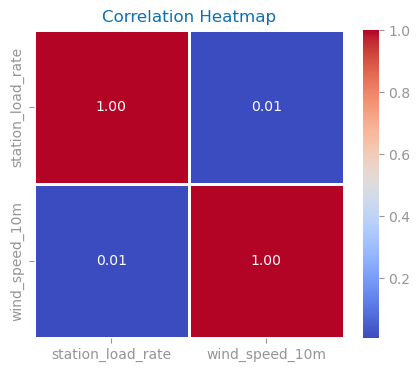

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['station_load_rate', 'wind_speed_10m']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


- Remove wind_speed_10m column as it has really low correlation with station_load_rate (-0.02)

In [35]:
df.drop(columns = ['wind_speed_10m'], inplace=True)
df.head()

,numbicicletas,numdocas,entity_ts,estado,entity_ts_hour,entity_ts_day,is_holiday_lisbon,gira_station_long,gira_station_lat,temperature_2m,rain_mm,wmo_weather_code,wmo_weather_desc,station_load_rate,gira_station_id,gira_station_name
0,9,17,2022-10-08 00:41:01,active,2022-10-08 00:00:00,2022-10-08,0.0,-9.149490,38.706620,18.1,0.0,0,Clear sky,52.9,215,Av. 24 de Julho
1,0,12,2022-08-09 08:20:14,active,2022-08-09 08:00:00,2022-08-09,0.0,-9.157335,38.766075,19.5,0.0,1,Mainly clear,0.0,552,Alameda das Linhas de Torres / Hospital Puli
2,1,20,2022-05-03 15:06:41,active,2022-05-03 15:00:00,2022-05-03,0.0,-9.175260,38.760140,19.9,0.0,1,Mainly clear,5.0,488,Rua Fernando Namora / Rua António Quadros
3,7,10,2022-03-01 23:29:52,active,2022-03-01 23:00:00,2022-03-01,1.0,-9.149510,38.752430,12.4,0.0,0,Clear sky,70.0,463,Campo Grande / Av. da Igreja
4,1,27,2022-10-06 13:34:29,active,2022-10-06 13:00:00,2022-10-06,0.0,-9.158298,38.768683,27.3,0.0,3,Overcast,3.7,554,Alameda das Linhas de Torres / Rua Ladislau


#### Check if we can remove weather columns - rain_mm

In [287]:
df[['station_load_rate', 'rain_mm']].corr()


,station_load_rate,rain_mm
station_load_rate,1.000000,-0.007279
rain_mm,-0.007279,1.000000


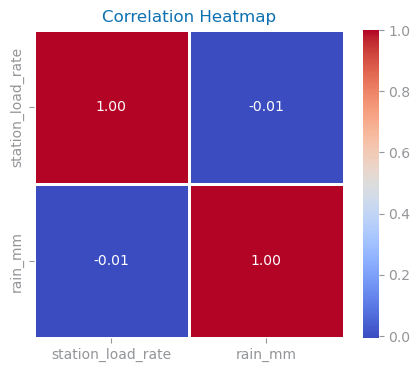

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['station_load_rate', 'rain_mm']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


- Remove rain_mm column as it has really low correlation with station_load_rate (-0.01)

In [38]:
df.drop(columns = ['rain_mm'], inplace=True)
df.head()

,numbicicletas,numdocas,entity_ts,estado,entity_ts_hour,entity_ts_day,is_holiday_lisbon,gira_station_long,gira_station_lat,temperature_2m,wmo_weather_code,wmo_weather_desc,station_load_rate,gira_station_id,gira_station_name
0,9,17,2022-10-08 00:41:01,active,2022-10-08 00:00:00,2022-10-08,0.0,-9.149490,38.706620,18.1,0,Clear sky,52.9,215,Av. 24 de Julho
1,0,12,2022-08-09 08:20:14,active,2022-08-09 08:00:00,2022-08-09,0.0,-9.157335,38.766075,19.5,1,Mainly clear,0.0,552,Alameda das Linhas de Torres / Hospital Puli
2,1,20,2022-05-03 15:06:41,active,2022-05-03 15:00:00,2022-05-03,0.0,-9.175260,38.760140,19.9,1,Mainly clear,5.0,488,Rua Fernando Namora / Rua António Quadros
3,7,10,2022-03-01 23:29:52,active,2022-03-01 23:00:00,2022-03-01,1.0,-9.149510,38.752430,12.4,0,Clear sky,70.0,463,Campo Grande / Av. da Igreja
4,1,27,2022-10-06 13:34:29,active,2022-10-06 13:00:00,2022-10-06,0.0,-9.158298,38.768683,27.3,3,Overcast,3.7,554,Alameda das Linhas de Torres / Rua Ladislau


#### Check if i can remove weather columns - temperature_2m

In [290]:
df[['station_load_rate', 'temperature_2m']].corr()


,station_load_rate,temperature_2m
station_load_rate,1.000000,-0.118351
temperature_2m,-0.118351,1.000000


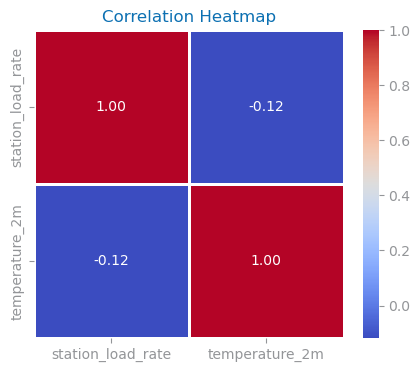

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['station_load_rate', 'temperature_2m']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


- Kepp col temperature_2m in th df, becasue it has a small negative correlation with the station_load_rate (-0,11)

#### Check if we can remove weather columns - wmo_weather_code

In [308]:
df[['station_load_rate', 'wmo_weather_code']].corr()


,station_load_rate,wmo_weather_code
station_load_rate,1.000000,-0.014922
wmo_weather_code,-0.014922,1.000000


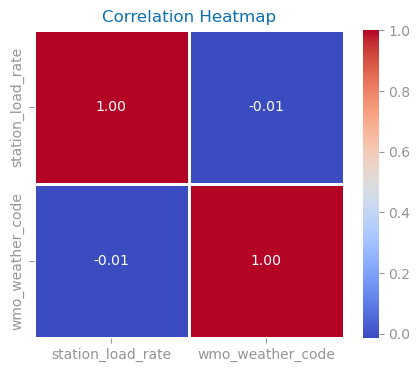

In [309]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[['station_load_rate', 'wmo_weather_code']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


# Data Exploration


# Create/save dataset for time forecasting (1)

In [91]:
df_final_cleaned.shape

(10814, 13)

In [76]:
df_agg_with_ext_vars = df_final_cleaned.copy()

if test_data==False:
    df_agg_with_ext_vars.to_csv('data/df_gira_agg_2h_pre_proc.csv',index=False)

df_final_cleaned.head()

,date,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
0,2022-01-01 12:00:00,17.4,0.0,3,5.5,1.0,1.0,34.7,28.6,47.4,60.0,12.3,16.7
1,2022-01-01 14:00:00,18.6,0.0,3,5.8,1.0,1.0,20.0,14.3,37.2,68.0,13.0,13.3
2,2022-01-01 16:00:00,16.7,0.0,2,6.2,1.0,1.0,8.0,30.4,8.6,43.6,4.3,7.5
3,2022-01-01 18:00:00,13.9,0.0,3,7.6,1.0,1.0,4.0,20.0,25.6,15.0,0.0,10.0
4,2022-01-01 20:00:00,13.8,0.0,3,8.8,1.0,1.0,4.0,21.4,35.9,27.5,15.2,10.0


# Create dataset for time forecasting (2) - excluding external variables

In [77]:
df_agg_no_ext_vars = df_final_cleaned.copy()
df_agg_no_ext_vars.drop(columns = [
    'temperature_2m',
    'rain_mm',
    'wmo_weather_code',
    'wind_speed_10m',
    'is_holiday_lisbon',
    'target_station_status',
    'station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima',
    'station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia',
    'station_load_rate_ Praça de Londres',
    'station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego',
    'station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego'
      ], inplace=True)

if test_data==False:
    df_agg_no_ext_vars.to_csv('data/df_gira_agg_2h_no_ext_vars_pre_proc.csv',index=False)

df_agg_no_ext_vars.head()

,date,target_station_load_rate
0,2022-01-01 12:00:00,34.7
1,2022-01-01 14:00:00,20.0
2,2022-01-01 16:00:00,8.0
3,2022-01-01 18:00:00,4.0
4,2022-01-01 20:00:00,4.0
